In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
#################
### Todo
### 2. think about evolution in slope (changes in offsets, z values?)
####           a) Need to create upstream and downstream offsets, adjust
####              these in slope adjustment and fix flow depth calcs
####              to account for offsets.
####           B) tried approach of offset adjustment. this seemed unstable
####              if instead we adjust z_arr to bed and calc slope from z_arr, this seems to work
####              Had to adjust flow calculation because of this. z_arr-->z_arr-xc.ymin
### 3. create test cases
###########3
### 4. brainstorm model scenarios to run (do this next, then plan appropriate test cases)
###     A) Thinking about short time scales - how do seasonal patterns
###        reflect in average erosion rates. 
###          1. different scenarios with different length scales of exchange and dissolution 
#####        2. seasonal sinusoidal temp curve (ignore diurnal cycles?)
###     B) Single conduit evolution
###        1. how does long-term evolution differ with w/o CO2 exchange
###        2. what impact does slope-dependent exchange have?
###        3. shear-stress dependent production (based on grain size)
###        4. How do phreatic loops evolve
###        5. What happens during periods of base level fall, stasis, or aggradation?
#################################

### 5. how to deal with loss of point density (different resampling scheme?)

Populating the interactive namespace from numpy and matplotlib


In [2]:
#import pixiedust


In [35]:
#%%pixie_debugger
from CO2_sim_1D import CO2_1D

n=20
x = linspace(0,5000,n)
z = linspace(1,2,n)
np.random.seed(7)
r = 0.5*ones(n-1)# + 0.1*np.random.rand(n-1)
#r[5] = 0.5
sim = CO2_1D(x,z, init_radii=r, 
             Q_w=0.05, 
             T_outside=20., 
             D_a=35., D_w=35.,
             adv_disp_stabil_factor=0.5,
             reduction_factor=0.01,
            dt_erode=1.,
            xc_n=1500)
ntimes = 500
fd_old=0.
for t in arange(ntimes):
    print('t=',t)
    sim.calc_flow_depths()
    fd_new = sim.fd_mids[0]
    #if t>0 and np.abs(fd_new-fd_old)>0.05:
    #    print(asdf)
    fd_old = fd_new
    sim.calc_air_flow()
    #if sim.A_a.min()==0:
    #    print(asdf)
    sim.calc_steady_state_transport()
    sim.erode_xcs()
    sim.z_arr[0] -= 0.005
    #if t==160:
    #    print(asdf)
    if t % 1 == 0:
        timestep_str = '%04d' % (t,)
        print("Plotting timestep: ",t)
        figure()
        plot(sim.xcs[0].x ,sim.xcs[0].y)
        wl = sim.fd_mids[0]+ sim.xcs[0].y.min()
        plot([-.5,.5], [wl,wl])
        plot(sim.xcs[4].x ,sim.xcs[4].y)
        plot(sim.xcs[-1].x ,sim.xcs[-1].y)
        savefig('./XC-'+timestep_str+'.png')
        figure()
        xmid = (x[1:] + x[:-1])/2.
        plot(x, sim.h)
        plot(x,z)
        plot(x,sim.CO2_w)
        plot(x,sim.CO2_a)
        plot(x,sim.Ca)
        legend(['h','z','w','a','Ca'])
        savefig('./Profile-'+timestep_str+'.png')
        figure()
        xmid = (x[1:] + x[:-1])/2.
        plot(xmid,sim.slopes)
        yscale('log')
        tight_layout()
        savefig('./Slope-'+timestep_str+'.png')
        figure()
        loglog(sim.slopes, abs(sim.dz), 'o')
        ylabel('dz')
        xlabel('slope')
        tight_layout()
        savefig('./Slope_vs_erosion-'+timestep_str+'.png')
        close('all')

t= 0
zero or neg flow depth
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171
xc= 0
Q residual for 0.23420000879887182  = 1.4273090753746942e-07
norm_fd= 0.23420000879887182   maxdepth= 0.9999994516877171
dwnscrit
getting width
got L,R
setting fd
done with this xc
zero or neg flow depth
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171
xc= 1
Q residual for 0.23420000879887182  = 1.4273090753746942e-07
norm_fd= 0.23420000879887182   maxdepth= 0.9999994516877171
norm
getting width
got L,R
setting fd
done with this xc
zero or neg flow depth
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171
xc= 2
Q residual for 0.2342000087988711  = 1.4273090751665274e-07
norm_fd= 0.23420

t= 1
xc points= 293  maxdpeth= 1.0009267978616596   max_interp= 0.09179183208207951
xc points= 293  maxdpeth= 1.0009267978616596   max_interp= 0.09179183208207951
xc= 0
Q residual for 0.08077150671527548  = 0.021823171087594496
norm_fd= 0.08077150671527548   maxdepth= 1.0009267978616596
norm
getting width
got L,R
setting fd
done with this xc
xc points= 545  maxdpeth= 1.0006148458519732   max_interp= 0.29275001099858977
xc points= 545  maxdpeth= 1.0006148458519732   max_interp= 0.29275001099858977
xc= 1
Q residual for 0.2327429674996989  = 8.027181326586419e-08
norm_fd= 0.2327429674996989   maxdepth= 1.0006148458519732
norm
getting width
got L,R
setting fd
done with this xc
xc points= 545  maxdpeth= 1.0003648742479996   max_interp= 0.2927500109985889
xc points= 545  maxdpeth= 1.0003648742479996   max_interp= 0.2927500109985889
xc= 2
Q residual for 0.23242452215829032  = 9.013437116817125e-08
norm_fd= 0.23242452215829032   maxdepth= 1.0003648742479996
norm
getting width
got L,R
setting f

t= 2
xc points= 307  maxdpeth= 1.001434619386159   max_interp= 0.10096438339409436
xc points= 307  maxdpeth= 1.001434619386159   max_interp= 0.10096438339409436
xc= 0
Q residual for 0.08884278393814997  = 0.019200610266955725
norm_fd= 0.08884278393814997   maxdepth= 1.001434619386159
norm
getting width
got L,R
setting fd
done with this xc
xc points= 543  maxdpeth= 1.0013362033555522   max_interp= 0.2909287093746236
xc points= 543  maxdpeth= 1.0013362033555522   max_interp= 0.2909287093746236
xc= 1
Q residual for 0.23208674104552776  = 2.9472549176873253e-07
norm_fd= 0.23208674104552776   maxdepth= 1.0013362033555522
norm
getting width
got L,R
setting fd
done with this xc
xc points= 543  maxdpeth= 1.0007315338673157   max_interp= 0.2905306526978629
xc points= 543  maxdpeth= 1.0007315338673157   max_interp= 0.2905306526978629
xc= 2
Q residual for 0.23052081234597682  = 2.118030037190355e-07
norm_fd= 0.23052081234597682   maxdepth= 1.0007315338673157
norm
getting width
got L,R
setting fd


t= 3
xc points= 322  maxdpeth= 1.0019455386084022   max_interp= 0.11105347992268746
xc points= 322  maxdpeth= 1.0019455386084022   max_interp= 0.11105347992268746
xc= 0
Q residual for 0.09772060195893931  = 0.016394761876896105
norm_fd= 0.09772060195893931   maxdepth= 1.0019455386084022
norm
getting width
got L,R
setting fd
done with this xc
xc points= 542  maxdpeth= 1.0020435307147912   max_interp= 0.2901084263069097
xc points= 542  maxdpeth= 1.0020435307147912   max_interp= 0.2901084263069097
xc= 1
Q residual for 0.23232710980953766  = 3.0443218876352596e-08
norm_fd= 0.23232710980953766   maxdepth= 1.0020435307147912
norm
getting width
got L,R
setting fd
done with this xc
xc points= 540  maxdpeth= 1.001095829867026   max_interp= 0.288151015432471
xc points= 540  maxdpeth= 1.001095829867026   max_interp= 0.288151015432471
xc= 2
Q residual for 0.2294590396849074  = 2.0534171082942088e-07
norm_fd= 0.2294590396849074   maxdepth= 1.001095829867026
norm
getting width
got L,R
setting fd
don

t= 4
xc points= 338  maxdpeth= 1.0024594511035865   max_interp= 0.12215075244867413
xc points= 338  maxdpeth= 1.0024594511035865   max_interp= 0.12215075244867413
xc= 0
Q residual for 0.10748889113527929  = 0.01339031097973558
norm_fd= 0.10748889113527929   maxdepth= 1.0024594511035865
norm
getting width
got L,R
setting fd
done with this xc
xc points= 542  maxdpeth= 1.0027352273203558   max_interp= 0.2904088872619221
xc points= 542  maxdpeth= 1.0027352273203558   max_interp= 0.2904088872619221
xc= 1
Q residual for 0.23239303558906227  = 1.1917047071374753e-09
norm_fd= 0.23239303558906227   maxdepth= 1.0027352273203558
norm
getting width
got L,R
setting fd
done with this xc
xc points= 539  maxdpeth= 1.001457545596924   max_interp= 0.28682379960613424
xc points= 539  maxdpeth= 1.001457545596924   max_interp= 0.28682379960613424
xc= 2
Q residual for 0.22749051868993397  = 2.968444823281402e-09
norm_fd= 0.22749051868993397   maxdepth= 1.001457545596924
norm
getting width
got L,R
setting fd

t= 5
xc points= 355  maxdpeth= 1.002974172915721   max_interp= 0.1343611139190991
xc points= 355  maxdpeth= 1.002974172915721   max_interp= 0.1343611139190991
xc= 0
Q residual for 0.11823329906151203  = 0.010196288714755086
norm_fd= 0.11823329906151203   maxdepth= 1.002974172915721
norm
getting width
got L,R
setting fd
done with this xc
xc points= 541  maxdpeth= 1.003408953037188   max_interp= 0.2904912944863278
xc points= 541  maxdpeth= 1.003408953037188   max_interp= 0.2904912944863278
xc= 1
Q residual for 0.23214453469054588  = 8.870965841067946e-08
norm_fd= 0.23214453469054588   maxdepth= 1.003408953037188
norm
getting width
got L,R
setting fd
done with this xc
xc points= 536  maxdpeth= 1.0018138988753784   max_interp= 0.2843631483624175
xc points= 536  maxdpeth= 1.0018138988753784   max_interp= 0.2843631483624175
xc= 2
Q residual for 0.22560622226199703  = 1.0864311728725484e-07
norm_fd= 0.22560622226199703   maxdepth= 1.0018138988753784
norm
getting width
got L,R
setting fd
done 

t= 6
xc points= 373  maxdpeth= 1.0034923813785546   max_interp= 0.14779162382689004
xc points= 373  maxdpeth= 1.0034923813785546   max_interp= 0.14779162382689004
xc= 0
Q residual for 0.13005136664748282  = 0.006793261523762147
norm_fd= 0.13005136664748282   maxdepth= 1.0034923813785546
norm
getting width
got L,R
setting fd
done with this xc
xc points= 541  maxdpeth= 1.0040615672212048   max_interp= 0.29018066836318235
xc points= 541  maxdpeth= 1.0040615672212048   max_interp= 0.29018066836318235
xc= 1
Q residual for 0.231317041829905  = 6.677003422383976e-09
norm_fd= 0.231317041829905   maxdepth= 1.0040615672212048
norm
getting width
got L,R
setting fd
done with this xc
xc points= 533  maxdpeth= 1.00216619918787   max_interp= 0.2820077778274963
xc points= 533  maxdpeth= 1.00216619918787   max_interp= 0.2820077778274963
xc= 2
Q residual for 0.2239062851311979  = 7.199389983475468e-08
norm_fd= 0.2239062851311979   maxdepth= 1.00216619918787
norm
getting width
got L,R
setting fd
done wit

t= 7
xc points= 392  maxdpeth= 1.0040101625400617   max_interp= 0.16256420830935353
xc points= 392  maxdpeth= 1.0040101625400617   max_interp= 0.16256420830935353
xc= 0
Q residual for 0.14305065858666022  = 0.003300483971376951
norm_fd= 0.14305065858666022   maxdepth= 1.0040101625400617
norm
getting width
got L,R
setting fd
done with this xc
xc points= 540  maxdpeth= 1.004688708105096   max_interp= 0.28914630228738125
xc points= 540  maxdpeth= 1.004688708105096   max_interp= 0.28914630228738125
xc= 1
Q residual for 0.2321729657241407  = 2.7320766531058194e-08
norm_fd= 0.2321729657241407   maxdepth= 1.004688708105096
norm
getting width
got L,R
setting fd
done with this xc
xc points= 531  maxdpeth= 1.0025171521288954   max_interp= 0.27988285641399735
xc points= 531  maxdpeth= 1.0025171521288954   max_interp= 0.27988285641399735
xc= 2
Q residual for 0.22250386190934157  = 3.1448318331406266e-08
norm_fd= 0.22250386190934157   maxdepth= 1.0025171521288954
norm
getting width
got L,R
setting 

t= 8
xc points= 413  maxdpeth= 1.0045283821750326   max_interp= 0.17881332323332527
xc points= 413  maxdpeth= 1.0045283821750326   max_interp= 0.17881332323332527
xc= 0
Q residual for 0.15370455124364713  = 2.640418298172076e-07
norm_fd= 0.15370455124364713   maxdepth= 1.0045283821750326
norm
getting width
got L,R
setting fd
done with this xc
xc points= 541  maxdpeth= 1.0052908244819823   max_interp= 0.2902162071551759
xc points= 541  maxdpeth= 1.0052908244819823   max_interp= 0.2902162071551759
xc= 1
Q residual for 0.23030132183815705  = 1.754063725517563e-08
norm_fd= 0.23030132183815705   maxdepth= 1.0052908244819823
norm
getting width
got L,R
setting fd
done with this xc
xc points= 529  maxdpeth= 1.002861502174869   max_interp= 0.27812982738667696
xc points= 529  maxdpeth= 1.002861502174869   max_interp= 0.27812982738667696
xc= 2
Q residual for 0.221396144322478  = 4.5815031227136593e-08
norm_fd= 0.221396144322478   maxdepth= 1.002861502174869
norm
getting width
got L,R
setting fd
d

t= 9
xc points= 429  maxdpeth= 1.0050500336974522   max_interp= 0.1921306890545589
xc points= 429  maxdpeth= 1.0050500336974522   max_interp= 0.1921306890545589
xc= 0
Q residual for 0.14641081271158649  = 1.6174872164570475e-07
norm_fd= 0.14641081271158649   maxdepth= 1.0050500336974522
norm
getting width
got L,R
setting fd
done with this xc
xc points= 538  maxdpeth= 1.0058667707976978   max_interp= 0.2878766522976963
xc points= 538  maxdpeth= 1.0058667707976978   max_interp= 0.2878766522976963
xc= 1
Q residual for 0.2298543390911468  = 8.491724216852514e-08
norm_fd= 0.2298543390911468   maxdepth= 1.0058667707976978
norm
getting width
got L,R
setting fd
done with this xc
xc points= 527  maxdpeth= 1.0032105421477095   max_interp= 0.2767451804030975
xc points= 527  maxdpeth= 1.0032105421477095   max_interp= 0.2767451804030975
xc= 2
Q residual for 0.2199148021055234  = 3.134661718390275e-08
norm_fd= 0.2199148021055234   maxdepth= 1.0032105421477095
norm
getting width
got L,R
setting fd
do

t= 10
xc points= 417  maxdpeth= 1.005591843429083   max_interp= 0.1830135158894831
xc points= 417  maxdpeth= 1.005591843429083   max_interp= 0.1830135158894831
xc= 0
Q residual for 0.13970220145850873  = 1.4922208951828608e-07
norm_fd= 0.13970220145850873   maxdepth= 1.005591843429083
norm
getting width
got L,R
setting fd
done with this xc
xc points= 537  maxdpeth= 1.0064581904496546   max_interp= 0.2873179238639335
xc points= 537  maxdpeth= 1.0064581904496546   max_interp= 0.2873179238639335
xc= 1
Q residual for 0.23014012531830286  = 8.353204229011313e-08
norm_fd= 0.23014012531830286   maxdepth= 1.0064581904496546
norm
getting width
got L,R
setting fd
done with this xc
xc points= 525  maxdpeth= 1.0035572838366287   max_interp= 0.27489350263190426
xc points= 525  maxdpeth= 1.0035572838366287   max_interp= 0.27489350263190426
xc= 2
Q residual for 0.2188699833158773  = 1.5998797016358868e-07
norm_fd= 0.2188699833158773   maxdepth= 1.0035572838366287
norm
getting width
got L,R
setting fd

t= 11
xc points= 406  maxdpeth= 1.0061553172967304   max_interp= 0.17462775182313592
xc points= 406  maxdpeth= 1.0061553172967304   max_interp= 0.17462775182313592
xc= 0
Q residual for 0.13262686363997014  = 4.371274146403037e-07
norm_fd= 0.13262686363997014   maxdepth= 1.0061553172967304
norm
getting width
got L,R
setting fd
done with this xc
xc points= 537  maxdpeth= 1.0070650589337857   max_interp= 0.28767515664787857
xc points= 537  maxdpeth= 1.0070650589337857   max_interp= 0.28767515664787857
xc= 1
Q residual for 0.22932949711367756  = 5.2493538502118575e-08
norm_fd= 0.22932949711367756   maxdepth= 1.0070650589337857
norm
getting width
got L,R
setting fd
done with this xc
xc points= 523  maxdpeth= 1.0038998650542288   max_interp= 0.2735874791448466
xc points= 523  maxdpeth= 1.0038998650542288   max_interp= 0.2735874791448466
xc= 2
Q residual for 0.2172863682330577  = 1.9275816089125986e-07
norm_fd= 0.2172863682330577   maxdepth= 1.0038998650542288
norm
getting width
got L,R
setti

t= 12
xc points= 394  maxdpeth= 1.0067402433905945   max_interp= 0.16578357954996267
xc points= 394  maxdpeth= 1.0067402433905945   max_interp= 0.16578357954996267
xc= 0
Q residual for 0.12710488723275587  = 3.8100284936032347e-07
norm_fd= 0.12710488723275587   maxdepth= 1.0067402433905945
norm
getting width
got L,R
setting fd
done with this xc
xc points= 536  maxdpeth= 1.0076867061845427   max_interp= 0.286661871392097
xc points= 536  maxdpeth= 1.0076867061845427   max_interp= 0.286661871392097
xc= 1
Q residual for 0.22871328183350523  = 7.876065621220674e-08
norm_fd= 0.22871328183350523   maxdepth= 1.0076867061845427
norm
getting width
got L,R
setting fd
done with this xc
xc points= 521  maxdpeth= 1.0042412536720837   max_interp= 0.2716079602913221
xc points= 521  maxdpeth= 1.0042412536720837   max_interp= 0.2716079602913221
xc= 2
Q residual for 0.21603635078040268  = 1.8902715822471938e-07
norm_fd= 0.21603635078040268   maxdepth= 1.0042412536720837
norm
getting width
got L,R
setting

t= 13
xc points= 384  maxdpeth= 1.0073451304118823   max_interp= 0.15888110904094482
xc points= 384  maxdpeth= 1.0073451304118823   max_interp= 0.15888110904094482
xc= 0
Q residual for 0.12189582050995675  = 1.0676638251966297e-07
norm_fd= 0.12189582050995675   maxdepth= 1.0073451304118823
norm
getting width
got L,R
setting fd
done with this xc
xc points= 535  maxdpeth= 1.0083188682796536   max_interp= 0.28589160229188154
xc points= 535  maxdpeth= 1.0083188682796536   max_interp= 0.28589160229188154
xc= 1
Q residual for 0.22721248020624418  = 1.1324249662991726e-07
norm_fd= 0.22721248020624418   maxdepth= 1.0083188682796536
norm
getting width
got L,R
setting fd
done with this xc
xc points= 519  maxdpeth= 1.0045820946728243   max_interp= 0.27004543847550333
xc points= 519  maxdpeth= 1.0045820946728243   max_interp= 0.27004543847550333
xc= 2
Q residual for 0.214175477517464  = 3.7033270047781564e-08
norm_fd= 0.214175477517464   maxdepth= 1.0045820946728243
norm
getting width
got L,R
sett

t= 14
xc points= 375  maxdpeth= 1.0079704238820322   max_interp= 0.15236977563744594
xc points= 375  maxdpeth= 1.0079704238820322   max_interp= 0.15236977563744594
xc= 0
Q residual for 0.11734008358478096  = 2.9018802037011904e-07
norm_fd= 0.11734008358478096   maxdepth= 1.0079704238820322
norm
getting width
got L,R
setting fd
done with this xc
xc points= 533  maxdpeth= 1.0089601896557412   max_interp= 0.28401560025780526
xc points= 533  maxdpeth= 1.0089601896557412   max_interp= 0.28401560025780526
xc= 1
Q residual for 0.22671983487044778  = 1.1966030694088303e-07
norm_fd= 0.22671983487044778   maxdepth= 1.0089601896557412
norm
getting width
got L,R
setting fd
done with this xc
xc points= 517  maxdpeth= 1.0049234974171322   max_interp= 0.26771934689682997
xc points= 517  maxdpeth= 1.0049234974171322   max_interp= 0.26771934689682997
xc= 2
Q residual for 0.2125714360869034  = 1.5977499289582253e-07
norm_fd= 0.2125714360869034   maxdepth= 1.0049234974171322
norm
getting width
got L,R
se

t= 15
xc points= 367  maxdpeth= 1.008613700962241   max_interp= 0.1466751044809762
xc points= 367  maxdpeth= 1.008613700962241   max_interp= 0.1466751044809762
xc= 0
Q residual for 0.11253879525643808  = 7.609950702924806e-08
norm_fd= 0.11253879525643808   maxdepth= 1.008613700962241
norm
getting width
got L,R
setting fd
done with this xc
xc points= 531  maxdpeth= 1.0096101476422528   max_interp= 0.2833997935880597
xc points= 531  maxdpeth= 1.0096101476422528   max_interp= 0.2833997935880597
xc= 1
Q residual for 0.2264835035714441  = 9.785928122701959e-08
norm_fd= 0.2264835035714441   maxdepth= 1.0096101476422528
norm
getting width
got L,R
setting fd
done with this xc
xc points= 514  maxdpeth= 1.005262463040611   max_interp= 0.26571429510862926
xc points= 514  maxdpeth= 1.005262463040611   max_interp= 0.26571429510862926
xc= 2
Q residual for 0.21119915620884658  = 1.273005200488897e-07
norm_fd= 0.21119915620884658   maxdepth= 1.005262463040611
norm
getting width
got L,R
setting fd
done

t= 16
xc points= 359  maxdpeth= 1.009278611046859   max_interp= 0.1406734940705476
xc points= 359  maxdpeth= 1.009278611046859   max_interp= 0.1406734940705476
xc= 0
Q residual for 0.10861926003422605  = 1.3111768445983607e-07
norm_fd= 0.10861926003422605   maxdepth= 1.009278611046859
norm
getting width
got L,R
setting fd
done with this xc
xc points= 531  maxdpeth= 1.010269415754988   max_interp= 0.2831043794643051
xc points= 531  maxdpeth= 1.010269415754988   max_interp= 0.2831043794643051
xc= 1
Q residual for 0.22618284202189617  = 1.1379590061921796e-07
norm_fd= 0.22618284202189617   maxdepth= 1.010269415754988
norm
getting width
got L,R
setting fd
done with this xc
xc points= 512  maxdpeth= 1.0055989172636146   max_interp= 0.2639989452610582
xc points= 512  maxdpeth= 1.0055989172636146   max_interp= 0.2639989452610582
xc= 2
Q residual for 0.21009666832847176  = 5.2309124892735426e-08
norm_fd= 0.21009666832847176   maxdepth= 1.0055989172636146
norm
getting width
got L,R
setting fd
d

t= 17
xc points= 351  maxdpeth= 1.0099615917054667   max_interp= 0.13577407504278255
xc points= 351  maxdpeth= 1.0099615917054667   max_interp= 0.13577407504278255
xc= 0
Q residual for 0.10509483027456443  = 3.616218743132671e-07
norm_fd= 0.10509483027456443   maxdepth= 1.0099615917054667
norm
getting width
got L,R
setting fd
done with this xc
xc points= 531  maxdpeth= 1.0109376484118189   max_interp= 0.2827285525273702
xc points= 531  maxdpeth= 1.0109376484118189   max_interp= 0.2827285525273702
xc= 1
Q residual for 0.22473309647134243  = 1.660413121579163e-08
norm_fd= 0.22473309647134243   maxdepth= 1.0109376484118189
norm
getting width
got L,R
setting fd
done with this xc
xc points= 511  maxdpeth= 1.0059334274363034   max_interp= 0.2626208354105897
xc points= 511  maxdpeth= 1.0059334274363034   max_interp= 0.2626208354105897
xc= 2
Q residual for 0.2092319091545344  = 1.511273779938871e-07
norm_fd= 0.2092319091545344   maxdepth= 1.0059334274363034
norm
getting width
got L,R
setting f

t= 18
xc points= 345  maxdpeth= 1.010663586106437   max_interp= 0.13136853784320554
xc points= 345  maxdpeth= 1.010663586106437   max_interp= 0.13136853784320554
xc= 0
Q residual for 0.10156677945795654  = 1.6536386172189e-07
norm_fd= 0.10156677945795654   maxdepth= 1.010663586106437
norm
getting width
got L,R
setting fd
done with this xc
xc points= 528  maxdpeth= 1.0116119073938197   max_interp= 0.28091637058917807
xc points= 528  maxdpeth= 1.0116119073938197   max_interp= 0.28091637058917807
xc= 1
Q residual for 0.22414272125939302  = 2.147546785402632e-07
norm_fd= 0.22414272125939302   maxdepth= 1.0116119073938197
norm
getting width
got L,R
setting fd
done with this xc
xc points= 509  maxdpeth= 1.0062725153652372   max_interp= 0.261539886443168
xc points= 509  maxdpeth= 1.0062725153652372   max_interp= 0.261539886443168
xc= 2
Q residual for 0.20674051409092142  = 7.195088122524673e-08
norm_fd= 0.20674051409092142   maxdepth= 1.0062725153652372
norm
getting width
got L,R
setting fd
d

t= 19
xc points= 338  maxdpeth= 1.0113853986772652   max_interp= 0.12695847432244567
xc points= 338  maxdpeth= 1.0113853986772652   max_interp= 0.12695847432244567
xc= 0
Q residual for 0.098405973981807  = 4.644674164028251e-08
norm_fd= 0.098405973981807   maxdepth= 1.0113853986772652
norm
getting width
got L,R
setting fd
done with this xc
xc points= 527  maxdpeth= 1.0122924309021901   max_interp= 0.2801784015742413
xc points= 527  maxdpeth= 1.0122924309021901   max_interp= 0.2801784015742413
xc= 1
Q residual for 0.2223917953493802  = 1.3332505782726045e-07
norm_fd= 0.2223917953493802   maxdepth= 1.0122924309021901
norm
getting width
got L,R
setting fd
done with this xc
xc points= 505  maxdpeth= 1.006606737322858   max_interp= 0.25842564261365175
xc points= 505  maxdpeth= 1.006606737322858   max_interp= 0.25842564261365175
xc= 2
Q residual for 0.20627556559452104  = 4.263667093690193e-08
norm_fd= 0.20627556559452104   maxdepth= 1.006606737322858
norm
getting width
got L,R
setting fd
do

dz= [-0.00074091 -0.00068507 -0.000341   -0.00044632 -0.00035023 -0.00038937
 -0.00037668 -0.00038394 -0.00038297 -0.00038374 -0.00038981 -0.00039109
 -0.0003902  -0.00039848 -0.00039791 -0.00040297 -0.0004093  -0.00041612
 -0.00042164]
CFL= 0.005645247191120611
Plotting timestep:  19
t= 20
xc points= 332  maxdpeth= 1.012126309675316   max_interp= 0.12300746747725876
xc points= 332  maxdpeth= 1.012126309675316   max_interp= 0.12300746747725876
xc= 0
Q residual for 0.09550023283439756  = 3.5216317469805025e-07
norm_fd= 0.09550023283439756   maxdepth= 1.012126309675316
norm
getting width
got L,R
setting fd
done with this xc
xc points= 524  maxdpeth= 1.012977496955994   max_interp= 0.27798974418672523
xc points= 524  maxdpeth= 1.012977496955994   max_interp= 0.27798974418672523
xc= 1
Q residual for 0.22131511407945478  = 1.0818090591391272e-07
norm_fd= 0.22131511407945478   maxdepth= 1.012977496955994
norm
getting width
got L,R
setting fd
done with this xc
xc points= 505  maxdpeth= 1.0069

t= 21
xc points= 326  maxdpeth= 1.0128834496087027   max_interp= 0.11937529104299695
xc points= 326  maxdpeth= 1.0128834496087027   max_interp= 0.11937529104299695
xc= 0
Q residual for 0.09268408277164888  = 1.562976138097527e-08
norm_fd= 0.09268408277164888   maxdepth= 1.0128834496087027
norm
getting width
got L,R
setting fd
done with this xc
xc points= 523  maxdpeth= 1.0136680709344505   max_interp= 0.2766438925993185
xc points= 523  maxdpeth= 1.0136680709344505   max_interp= 0.2766438925993185
xc= 1
Q residual for 0.2209576500609626  = 1.7404548349753135e-07
norm_fd= 0.2209576500609626   maxdepth= 1.0136680709344505
norm
getting width
got L,R
setting fd
done with this xc
xc points= 501  maxdpeth= 1.007286915271512   max_interp= 0.2552577090717232
xc points= 501  maxdpeth= 1.007286915271512   max_interp= 0.2552577090717232
xc= 2
Q residual for 0.2023275570733918  = 1.9223992765715625e-08
norm_fd= 0.2023275570733918   maxdepth= 1.007286915271512
norm
getting width
got L,R
setting fd
d

t= 22
xc points= 320  maxdpeth= 1.0136602545647762   max_interp= 0.1158551034645611
xc points= 320  maxdpeth= 1.0136602545647762   max_interp= 0.1158551034645611
xc= 0
Q residual for 0.0900692522153488  = 4.6098713351455656e-07
norm_fd= 0.0900692522153488   maxdepth= 1.0136602545647762
norm
getting width
got L,R
setting fd
done with this xc
xc points= 521  maxdpeth= 1.0143640102661344   max_interp= 0.27619706257620324
xc points= 521  maxdpeth= 1.0143640102661344   max_interp= 0.27619706257620324
xc= 1
Q residual for 0.21928935234373415  = 1.8136442861416135e-08
norm_fd= 0.21928935234373415   maxdepth= 1.0143640102661344
norm
getting width
got L,R
setting fd
done with this xc
xc points= 499  maxdpeth= 1.0076219669868438   max_interp= 0.2529094463417398
xc points= 499  maxdpeth= 1.0076219669868438   max_interp= 0.2529094463417398
xc= 2
Q residual for 0.20144652172595903  = 2.4029211800891126e-08
norm_fd= 0.20144652172595903   maxdepth= 1.0076219669868438
norm
getting width
got L,R
settin

t= 23
xc points= 314  maxdpeth= 1.014457186117859   max_interp= 0.11258656526918599
xc points= 314  maxdpeth= 1.014457186117859   max_interp= 0.11258656526918599
xc= 0
Q residual for 0.08785440868611903  = 1.8624973453090776e-07
norm_fd= 0.08785440868611903   maxdepth= 1.014457186117859
norm
getting width
got L,R
setting fd
done with this xc
xc points= 519  maxdpeth= 1.0150637031657055   max_interp= 0.27411169042966765
xc points= 519  maxdpeth= 1.0150637031657055   max_interp= 0.27411169042966765
xc= 1
Q residual for 0.21812005879258234  = 7.030050517414788e-08
norm_fd= 0.21812005879258234   maxdepth= 1.0150637031657055
norm
getting width
got L,R
setting fd
done with this xc
xc points= 497  maxdpeth= 1.0079626485349862   max_interp= 0.2518081521574488
xc points= 497  maxdpeth= 1.0079626485349862   max_interp= 0.2518081521574488
xc= 2
Q residual for 0.19994321597888579  = 9.150063854518331e-08
norm_fd= 0.19994321597888579   maxdepth= 1.0079626485349862
norm
getting width
got L,R
setting

t= 24
xc points= 309  maxdpeth= 1.0152707767953122   max_interp= 0.10981801085764879
xc points= 309  maxdpeth= 1.0152707767953122   max_interp= 0.10981801085764879
xc= 0
Q residual for 0.08582897675388704  = 3.452180202950794e-07
norm_fd= 0.08582897675388704   maxdepth= 1.0152707767953122
norm
getting width
got L,R
setting fd
done with this xc
xc points= 517  maxdpeth= 1.0157674445707483   max_interp= 0.2726500734907279
xc points= 517  maxdpeth= 1.0157674445707483   max_interp= 0.2726500734907279
xc= 1
Q residual for 0.21748739673403963  = 1.6172048965951147e-07
norm_fd= 0.21748739673403963   maxdepth= 1.0157674445707483
norm
getting width
got L,R
setting fd
done with this xc
xc points= 495  maxdpeth= 1.0083042955854205   max_interp= 0.24992901997360722
xc points= 495  maxdpeth= 1.0083042955854205   max_interp= 0.24992901997360722
xc= 2
Q residual for 0.19863738509712667  = 9.567215129846485e-08
norm_fd= 0.19863738509712667   maxdepth= 1.0083042955854205
norm
getting width
got L,R
sett

t= 25
xc points= 305  maxdpeth= 1.0161017513116635   max_interp= 0.10728622094235879
xc points= 305  maxdpeth= 1.0161017513116635   max_interp= 0.10728622094235879
xc= 0
Q residual for 0.08373858088698441  = 4.0618882926612976e-07
norm_fd= 0.08373858088698441   maxdepth= 1.0161017513116635
norm
getting width
got L,R
setting fd
done with this xc
xc points= 516  maxdpeth= 1.0164745583036967   max_interp= 0.27185924591754956
xc points= 516  maxdpeth= 1.0164745583036967   max_interp= 0.27185924591754956
xc= 1
Q residual for 0.21542465180107925  = 5.560032351192845e-09
norm_fd= 0.21542465180107925   maxdepth= 1.0164745583036967
norm
getting width
got L,R
setting fd
done with this xc
xc points= 493  maxdpeth= 1.0086455031668007   max_interp= 0.24829673137140834
xc points= 493  maxdpeth= 1.0086455031668007   max_interp= 0.24829673137140834
xc= 2
Q residual for 0.19753126481825334  = 1.2429583751139006e-07
norm_fd= 0.19753126481825334   maxdepth= 1.0086455031668007
norm
getting width
got L,R
s

t= 26
xc points= 300  maxdpeth= 1.0169489538162888   max_interp= 0.1046732261087305
xc points= 300  maxdpeth= 1.0169489538162888   max_interp= 0.1046732261087305
xc= 0
Q residual for 0.08172650071958852  = 5.573820164375687e-07
norm_fd= 0.08172650071958852   maxdepth= 1.0169489538162888
norm
getting width
got L,R
setting fd
done with this xc
xc points= 513  maxdpeth= 1.0171835533213875   max_interp= 0.2692808147513491
xc points= 513  maxdpeth= 1.0171835533213875   max_interp= 0.2692808147513491
xc= 1
Q residual for 0.2147634646087797  = 8.197038250251643e-08
norm_fd= 0.2147634646087797   maxdepth= 1.0171835533213875
norm
getting width
got L,R
setting fd
done with this xc
xc points= 491  maxdpeth= 1.0089921049214925   max_interp= 0.24691408102281667
xc points= 491  maxdpeth= 1.0089921049214925   max_interp= 0.24691408102281667
xc= 2
Q residual for 0.19577035615618762  = 2.3369395638767054e-07
norm_fd= 0.19577035615618762   maxdepth= 1.0089921049214925
norm
getting width
got L,R
setting 

t= 27
xc points= 295  maxdpeth= 1.017811808968736   max_interp= 0.10215812589948566
xc points= 295  maxdpeth= 1.017811808968736   max_interp= 0.10215812589948566
xc= 0
Q residual for 0.0798642100197909  = 6.465932112439954e-07
norm_fd= 0.0798642100197909   maxdepth= 1.017811808968736
norm
getting width
got L,R
setting fd
done with this xc
xc points= 511  maxdpeth= 1.0178974028776535   max_interp= 0.26845433076097464
xc points= 511  maxdpeth= 1.0178974028776535   max_interp= 0.26845433076097464
xc= 1
Q residual for 0.21338739132287107  = 1.3638305160212916e-07
norm_fd= 0.21338739132287107   maxdepth= 1.0178974028776535
norm
getting width
got L,R
setting fd
done with this xc
xc points= 489  maxdpeth= 1.0093365342196203   max_interp= 0.24471294519523454
xc points= 489  maxdpeth= 1.0093365342196203   max_interp= 0.24471294519523454
xc= 2
Q residual for 0.19424016704371877  = 7.101529170272514e-09
norm_fd= 0.19424016704371877   maxdepth= 1.0093365342196203
norm
getting width
got L,R
setting

t= 28
xc points= 291  maxdpeth= 1.0186904536910601   max_interp= 0.09983026252473862
xc points= 291  maxdpeth= 1.0186904536910601   max_interp= 0.09983026252473862
xc= 0
Q residual for 0.07837232310289505  = 6.069690853677256e-07
norm_fd= 0.07837232310289505   maxdepth= 1.0186904536910601
norm
getting width
got L,R
setting fd
done with this xc
xc points= 509  maxdpeth= 1.0186144410651123   max_interp= 0.26673423915358885
xc points= 509  maxdpeth= 1.0186144410651123   max_interp= 0.26673423915358885
xc= 1
Q residual for 0.21236301569820332  = 1.710567519921935e-07
norm_fd= 0.21236301569820332   maxdepth= 1.0186144410651123
norm
getting width
got L,R
setting fd
done with this xc
xc points= 487  maxdpeth= 1.0096826947468154   max_interp= 0.24280020880464848
xc points= 487  maxdpeth= 1.0096826947468154   max_interp= 0.24280020880464848
xc= 2
Q residual for 0.19294474884736354  = 2.671955779548485e-08
norm_fd= 0.19294474884736354   maxdepth= 1.0096826947468154
norm
getting width
got L,R
set

t= 29
xc points= 287  maxdpeth= 1.0195846568214673   max_interp= 0.09796540387861881
xc points= 287  maxdpeth= 1.0195846568214673   max_interp= 0.09796540387861881
xc= 0
Q residual for 0.07702846174761482  = 2.9560253965443817e-07
norm_fd= 0.07702846174761482   maxdepth= 1.0195846568214673
norm
getting width
got L,R
setting fd
done with this xc
xc points= 507  maxdpeth= 1.0193331540637909   max_interp= 0.26545376962275413
xc points= 507  maxdpeth= 1.0193331540637909   max_interp= 0.26545376962275413
xc= 1
Q residual for 0.21061544228713852  = 3.4273355602187916e-07
norm_fd= 0.21061544228713852   maxdepth= 1.0193331540637909
norm
getting width
got L,R
setting fd
done with this xc
xc points= 485  maxdpeth= 1.0100302162023251   max_interp= 0.24118093605920443
xc points= 485  maxdpeth= 1.0100302162023251   max_interp= 0.24118093605920443
xc= 2
Q residual for 0.1910066261709475  = 1.3017307110008147e-07
norm_fd= 0.1910066261709475   maxdepth= 1.0100302162023251
norm
getting width
got L,R
se

t= 30
xc points= 283  maxdpeth= 1.0204896606561262   max_interp= 0.09628557718451852
xc points= 283  maxdpeth= 1.0204896606561262   max_interp= 0.09628557718451852
xc= 0
Q residual for 0.07554495279800999  = 1.677127161245351e-07
norm_fd= 0.07554495279800999   maxdepth= 1.0204896606561262
norm
getting width
got L,R
setting fd
done with this xc
xc points= 505  maxdpeth= 1.0200531017468455   max_interp= 0.26326930285892314
xc points= 505  maxdpeth= 1.0200531017468455   max_interp= 0.26326930285892314
xc= 1
Q residual for 0.2091003440848369  = 1.3986382860903257e-07
norm_fd= 0.2091003440848369   maxdepth= 1.0200531017468455
norm
getting width
got L,R
setting fd
done with this xc
xc points= 482  maxdpeth= 1.0103792605180546   max_interp= 0.23875828271368438
xc points= 482  maxdpeth= 1.0103792605180546   max_interp= 0.23875828271368438
xc= 2
Q residual for 0.19021602934045453  = 9.46472927809694e-09
norm_fd= 0.19021602934045453   maxdepth= 1.0103792605180546
norm
getting width
got L,R
setti

t= 31
xc points= 279  maxdpeth= 1.0214098124739126   max_interp= 0.09443119099751249
xc points= 279  maxdpeth= 1.0214098124739126   max_interp= 0.09443119099751249
xc= 0
Q residual for 0.074339435554802  = 4.416166683937628e-07
norm_fd= 0.074339435554802   maxdepth= 1.0214098124739126
norm
getting width
got L,R
setting fd
done with this xc
xc points= 502  maxdpeth= 1.0207752006293829   max_interp= 0.26137543010604614
xc points= 502  maxdpeth= 1.0207752006293829   max_interp= 0.26137543010604614
xc= 1
Q residual for 0.20776064100648264  = 1.7796001864495148e-07
norm_fd= 0.20776064100648264   maxdepth= 1.0207752006293829
norm
getting width
got L,R
setting fd
done with this xc
xc points= 481  maxdpeth= 1.0107337850623965   max_interp= 0.23777003667556817
xc points= 481  maxdpeth= 1.0107337850623965   max_interp= 0.23777003667556817
xc= 2
Q residual for 0.18876770380458543  = 2.27934483509884e-08
norm_fd= 0.18876770380458543   maxdepth= 1.0107337850623965
norm
getting width
got L,R
setting

t= 32
xc points= 276  maxdpeth= 1.022346139659958   max_interp= 0.0929242944435025
xc points= 276  maxdpeth= 1.022346139659958   max_interp= 0.0929242944435025
xc= 0
Q residual for 0.07306712860234063  = 4.891403172987974e-07
norm_fd= 0.07306712860234063   maxdepth= 1.022346139659958
norm
getting width
got L,R
setting fd
done with this xc
xc points= 500  maxdpeth= 1.0214994407123212   max_interp= 0.2597008012581033
xc points= 500  maxdpeth= 1.0214994407123212   max_interp= 0.2597008012581033
xc= 1
Q residual for 0.20654173869612302  = 3.703210976063742e-08
norm_fd= 0.20654173869612302   maxdepth= 1.0214994407123212
norm
getting width
got L,R
setting fd
done with this xc
xc points= 479  maxdpeth= 1.0110902899548027   max_interp= 0.2359596297557318
xc points= 479  maxdpeth= 1.0110902899548027   max_interp= 0.2359596297557318
xc= 2
Q residual for 0.18755608986123087  = 1.4054906403299094e-07
norm_fd= 0.18755608986123087   maxdepth= 1.0110902899548027
norm
getting width
got L,R
setting fd


t= 33
xc points= 272  maxdpeth= 1.0232972808569705   max_interp= 0.0913339107529258
xc points= 272  maxdpeth= 1.0232972808569705   max_interp= 0.0913339107529258
xc= 0
Q residual for 0.07235105631229867  = 2.3644167582159703e-07
norm_fd= 0.07235105631229867   maxdepth= 1.0232972808569705
norm
getting width
got L,R
setting fd
done with this xc
xc points= 498  maxdpeth= 1.0222262544799747   max_interp= 0.2581771733701538
xc points= 498  maxdpeth= 1.0222262544799747   max_interp= 0.2581771733701538
xc= 1
Q residual for 0.20450560811847884  = 7.688371301411978e-08
norm_fd= 0.20450560811847884   maxdepth= 1.0222262544799747
norm
getting width
got L,R
setting fd
done with this xc
xc points= 477  maxdpeth= 1.011448269084871   max_interp= 0.23444511232653859
xc points= 477  maxdpeth= 1.011448269084871   max_interp= 0.23444511232653859
xc= 2
Q residual for 0.186607629632052  = 3.060139856791988e-09
norm_fd= 0.186607629632052   maxdepth= 1.011448269084871
norm
getting width
got L,R
setting fd
do

t= 34
xc points= 269  maxdpeth= 1.0242593241743168   max_interp= 0.09043882039037333
xc points= 269  maxdpeth= 1.0242593241743168   max_interp= 0.09043882039037333
xc= 0
Q residual for 0.07109830521291001  = 1.0224599521907463e-07
norm_fd= 0.07109830521291001   maxdepth= 1.0242593241743168
norm
getting width
got L,R
setting fd
done with this xc
xc points= 495  maxdpeth= 1.0229528589205543   max_interp= 0.25563201014809855
xc points= 495  maxdpeth= 1.0229528589205543   max_interp= 0.25563201014809855
xc= 1
Q residual for 0.20345239483029307  = 3.908194362578499e-08
norm_fd= 0.20345239483029307   maxdepth= 1.0229528589205543
norm
getting width
got L,R
setting fd
done with this xc
xc points= 475  maxdpeth= 1.0118131691052892   max_interp= 0.233259537040065
xc points= 475  maxdpeth= 1.0118131691052892   max_interp= 0.233259537040065
xc= 2
Q residual for 0.18422637918744666  = 8.877516170791022e-08
norm_fd= 0.18422637918744666   maxdepth= 1.0118131691052892
norm
getting width
got L,R
settin

t= 35
xc points= 266  maxdpeth= 1.0252306899454293   max_interp= 0.08887288151613751
xc points= 266  maxdpeth= 1.0252306899454293   max_interp= 0.08887288151613751
xc= 0
Q residual for 0.07046299327664957  = 7.227572852985809e-07
norm_fd= 0.07046299327664957   maxdepth= 1.0252306899454293
norm
getting width
got L,R
setting fd
done with this xc
xc points= 493  maxdpeth= 1.0236822874932687   max_interp= 0.2543154935378663
xc points= 493  maxdpeth= 1.0236822874932687   max_interp= 0.2543154935378663
xc= 1
Q residual for 0.20154412755993387  = 9.6803482875496e-08
norm_fd= 0.20154412755993387   maxdepth= 1.0236822874932687
norm
getting width
got L,R
setting fd
done with this xc
xc points= 472  maxdpeth= 1.0121759573164617   max_interp= 0.23028297398430833
xc points= 472  maxdpeth= 1.0121759573164617   max_interp= 0.23028297398430833
xc= 2
Q residual for 0.18381097297036528  = 6.366051380490845e-08
norm_fd= 0.18381097297036528   maxdepth= 1.0121759573164617
norm
getting width
got L,R
setting

t= 36
xc points= 263  maxdpeth= 1.0262174783605205   max_interp= 0.08807874159581196
xc points= 263  maxdpeth= 1.0262174783605205   max_interp= 0.08807874159581196
xc= 0
Q residual for 0.06940274316023563  = 5.080282705557937e-07
norm_fd= 0.06940274316023563   maxdepth= 1.0262174783605205
norm
getting width
got L,R
setting fd
done with this xc
xc points= 491  maxdpeth= 1.0244115967444205   max_interp= 0.2519301594499173
xc points= 491  maxdpeth= 1.0244115967444205   max_interp= 0.2519301594499173
xc= 1
Q residual for 0.19964591791934  = 2.227783616540191e-07
norm_fd= 0.19964591791934   maxdepth= 1.0244115967444205
norm
getting width
got L,R
setting fd
done with this xc
xc points= 471  maxdpeth= 1.0125463495070441   max_interp= 0.2297637162129566
xc points= 471  maxdpeth= 1.0125463495070441   max_interp= 0.2297637162129566
xc= 2
Q residual for 0.18213170644333276  = 1.7950568681479595e-07
norm_fd= 0.18213170644333276   maxdepth= 1.0125463495070441
norm
getting width
got L,R
setting fd
d

t= 37
xc points= 259  maxdpeth= 1.0272128934229237   max_interp= 0.08675342895029454
xc points= 259  maxdpeth= 1.0272128934229237   max_interp= 0.08675342895029454
xc= 0
Q residual for 0.06849647456330567  = 2.692858674657739e-07
norm_fd= 0.06849647456330567   maxdepth= 1.0272128934229237
norm
getting width
got L,R
setting fd
done with this xc
xc points= 489  maxdpeth= 1.0251414235936753   max_interp= 0.24955739739917498
xc points= 489  maxdpeth= 1.0251414235936753   max_interp= 0.24955739739917498
xc= 1
Q residual for 0.19863227918222398  = 3.196036506974975e-08
norm_fd= 0.19863227918222398   maxdepth= 1.0251414235936753
norm
getting width
got L,R
setting fd
done with this xc
xc points= 469  maxdpeth= 1.0129199886273899   max_interp= 0.22766463305416595
xc points= 469  maxdpeth= 1.0129199886273899   max_interp= 0.22766463305416595
xc= 2
Q residual for 0.18079821119134334  = 6.0874587592962826e-09
norm_fd= 0.18079821119134334   maxdepth= 1.0129199886273899
norm
getting width
got L,R
se

t= 38
xc points= 257  maxdpeth= 1.0282232946004801   max_interp= 0.08562059320413208
xc points= 257  maxdpeth= 1.0282232946004801   max_interp= 0.08562059320413208
xc= 0
Q residual for 0.06780942225360952  = 3.2373057084339463e-07
norm_fd= 0.06780942225360952   maxdepth= 1.0282232946004801
norm
getting width
got L,R
setting fd
done with this xc
xc points= 487  maxdpeth= 1.0258736604617722   max_interp= 0.24829034897777996
xc points= 487  maxdpeth= 1.0258736604617722   max_interp= 0.24829034897777996
xc= 1
Q residual for 0.19670571110013543  = 2.0725191765547102e-07
norm_fd= 0.19670571110013543   maxdepth= 1.0258736604617722
norm
getting width
got L,R
setting fd
done with this xc
xc points= 467  maxdpeth= 1.0132947438552362   max_interp= 0.22599776398917917
xc points= 467  maxdpeth= 1.0132947438552362   max_interp= 0.22599776398917917
xc= 2
Q residual for 0.17981043880766695  = 1.4340962390529954e-07
norm_fd= 0.17981043880766695   maxdepth= 1.0132947438552362
norm
getting width
got L,R


t= 39
xc points= 254  maxdpeth= 1.0292431904698787   max_interp= 0.0847617778170119
xc points= 254  maxdpeth= 1.0292431904698787   max_interp= 0.0847617778170119
xc= 0
Q residual for 0.06685247916795835  = 6.957356750575405e-07
norm_fd= 0.06685247916795835   maxdepth= 1.0292431904698787
norm
getting width
got L,R
setting fd
done with this xc
xc points= 484  maxdpeth= 1.0266060699787436   max_interp= 0.2458821388751693
xc points= 484  maxdpeth= 1.0266060699787436   max_interp= 0.2458821388751693
xc= 1
Q residual for 0.19560385965382796  = 9.966130177369026e-08
norm_fd= 0.19560385965382796   maxdepth= 1.0266060699787436
norm
getting width
got L,R
setting fd
done with this xc
xc points= 465  maxdpeth= 1.0136756402033174   max_interp= 0.22476304850958367
xc points= 465  maxdpeth= 1.0136756402033174   max_interp= 0.22476304850958367
xc= 2
Q residual for 0.1791407294849287  = 2.340476877027431e-07
norm_fd= 0.1791407294849287   maxdepth= 1.0136756402033174
norm
getting width
got L,R
setting f

t= 40
xc points= 250  maxdpeth= 1.030276027019807   max_interp= 0.08356559895994793
xc points= 250  maxdpeth= 1.030276027019807   max_interp= 0.08356559895994793
xc= 0
Q residual for 0.06664060515107173  = 1.2304893404341266e-06
norm_fd= 0.06664060515107173   maxdepth= 1.030276027019807
norm
getting width
got L,R
setting fd
done with this xc
xc points= 483  maxdpeth= 1.0273407237786067   max_interp= 0.24450482456728495
xc points= 483  maxdpeth= 1.0273407237786067   max_interp= 0.24450482456728495
xc= 1
Q residual for 0.19350473762809775  = 2.9963760805190587e-07
norm_fd= 0.19350473762809775   maxdepth= 1.0273407237786067
norm
getting width
got L,R
setting fd
done with this xc
xc points= 464  maxdpeth= 1.0140597088800154   max_interp= 0.2239259118561609
xc points= 464  maxdpeth= 1.0140597088800154   max_interp= 0.2239259118561609
xc= 2
Q residual for 0.17720229417132372  = 1.6713258907397055e-07
norm_fd= 0.17720229417132372   maxdepth= 1.0140597088800154
norm
getting width
got L,R
setti

t= 41
xc points= 249  maxdpeth= 1.0313123517345684   max_interp= 0.08330075643883966
xc points= 249  maxdpeth= 1.0313123517345684   max_interp= 0.08330075643883966
xc= 0
Q residual for 0.06623812107492318  = 4.5671828507315437e-07
norm_fd= 0.06623812107492318   maxdepth= 1.0313123517345684
norm
getting width
got L,R
setting fd
done with this xc
xc points= 479  maxdpeth= 1.0280739292450483   max_interp= 0.24188092203512218
xc points= 479  maxdpeth= 1.0280739292450483   max_interp= 0.24188092203512218
xc= 1
Q residual for 0.1922649968847081  = 5.445705662798783e-08
norm_fd= 0.1922649968847081   maxdepth= 1.0280739292450483
norm
getting width
got L,R
setting fd
done with this xc
xc points= 461  maxdpeth= 1.0144466422839171   max_interp= 0.22150286771415464
xc points= 461  maxdpeth= 1.0144466422839171   max_interp= 0.22150286771415464
xc= 2
Q residual for 0.17652733299397083  = 3.0660073085941875e-07
norm_fd= 0.17652733299397083   maxdepth= 1.0144466422839171
norm
getting width
got L,R
set

t= 42
xc points= 246  maxdpeth= 1.0323572184574301   max_interp= 0.08279765134365397
xc points= 246  maxdpeth= 1.0323572184574301   max_interp= 0.08279765134365397
xc= 0
Q residual for 0.065681801593932  = 4.328909253975555e-08
norm_fd= 0.065681801593932   maxdepth= 1.0323572184574301
norm
getting width
got L,R
setting fd
done with this xc
xc points= 477  maxdpeth= 1.0288081491268253   max_interp= 0.24033124610588513
xc points= 477  maxdpeth= 1.0288081491268253   max_interp= 0.24033124610588513
xc= 1
Q residual for 0.19007382492864186  = 1.6948110936887417e-07
norm_fd= 0.19007382492864186   maxdepth= 1.0288081491268253
norm
getting width
got L,R
setting fd
done with this xc
xc points= 460  maxdpeth= 1.014838257040261   max_interp= 0.22065916624246354
xc points= 460  maxdpeth= 1.014838257040261   max_interp= 0.22065916624246354
xc= 2
Q residual for 0.1754021113120233  = 1.9592140971386174e-07
norm_fd= 0.1754021113120233   maxdepth= 1.014838257040261
norm
getting width
got L,R
setting fd

t= 43
xc points= 243  maxdpeth= 1.0334158452270552   max_interp= 0.082102251992415
xc points= 243  maxdpeth= 1.0334158452270552   max_interp= 0.082102251992415
xc= 0
Q residual for 0.06498962266371403  = 6.316337769624036e-07
norm_fd= 0.06498962266371403   maxdepth= 1.0334158452270552
norm
getting width
got L,R
setting fd
done with this xc
xc points= 475  maxdpeth= 1.0295433268424332   max_interp= 0.23759228116080233
xc points= 475  maxdpeth= 1.0295433268424332   max_interp= 0.23759228116080233
xc= 1
Q residual for 0.18946329610673227  = 4.2985011890206426e-08
norm_fd= 0.18946329610673227   maxdepth= 1.0295433268424332
norm
getting width
got L,R
setting fd
done with this xc
xc points= 458  maxdpeth= 1.0152352259316544   max_interp= 0.21925263914002913
xc points= 458  maxdpeth= 1.0152352259316544   max_interp= 0.21925263914002913
xc= 2
Q residual for 0.17387660020909165  = 2.2362631148936662e-07
norm_fd= 0.17387660020909165   maxdepth= 1.0152352259316544
norm
getting width
got L,R
setti

t= 44
xc points= 241  maxdpeth= 1.0344825027040088   max_interp= 0.08123702832964252
xc points= 241  maxdpeth= 1.0344825027040088   max_interp= 0.08123702832964252
xc= 0
Q residual for 0.06470655663395644  = 7.083883875325103e-09
norm_fd= 0.06470655663395644   maxdepth= 1.0344825027040088
norm
getting width
got L,R
setting fd
done with this xc
xc points= 473  maxdpeth= 1.0302797389524339   max_interp= 0.23682912013341534
xc points= 473  maxdpeth= 1.0302797389524339   max_interp= 0.23682912013341534
xc= 1
Q residual for 0.18700724020600085  = 1.2039403508162794e-07
norm_fd= 0.18700724020600085   maxdepth= 1.0302797389524339
norm
getting width
got L,R
setting fd
done with this xc
xc points= 456  maxdpeth= 1.0156321841326792   max_interp= 0.21734575026136457
xc points= 456  maxdpeth= 1.0156321841326792   max_interp= 0.21734575026136457
xc= 2
Q residual for 0.17352310940281365  = 9.867400922042302e-08
norm_fd= 0.17352310940281365   maxdepth= 1.0156321841326792
norm
getting width
got L,R
se

t= 45
xc points= 239  maxdpeth= 1.0355569548915993   max_interp= 0.08088319579244554
xc points= 239  maxdpeth= 1.0355569548915993   max_interp= 0.08088319579244554
xc= 0
Q residual for 0.06384778655881983  = 3.243713657882785e-07
norm_fd= 0.06384778655881983   maxdepth= 1.0355569548915993
norm
getting width
got L,R
setting fd
done with this xc
xc points= 470  maxdpeth= 1.0310159817625306   max_interp= 0.23375905025750104
xc points= 470  maxdpeth= 1.0310159817625306   max_interp= 0.23375905025750104
xc= 1
Q residual for 0.1861852425321788  = 8.996229412805423e-08
norm_fd= 0.1861852425321788   maxdepth= 1.0310159817625306
norm
getting width
got L,R
setting fd
done with this xc
xc points= 455  maxdpeth= 1.016038584827226   max_interp= 0.21690388675351707
xc points= 455  maxdpeth= 1.016038584827226   max_interp= 0.21690388675351707
xc= 2
Q residual for 0.17204393829643697  = 1.2497036082359525e-07
norm_fd= 0.17204393829643697   maxdepth= 1.016038584827226
norm
getting width
got L,R
setting

t= 46
xc points= 235  maxdpeth= 1.0366369804196287   max_interp= 0.07980973319852479
xc points= 235  maxdpeth= 1.0366369804196287   max_interp= 0.07980973319852479
xc= 0
Q residual for 0.06384794867445695  = 1.2680252139199433e-06
norm_fd= 0.06384794867445695   maxdepth= 1.0366369804196287
norm
getting width
got L,R
setting fd
done with this xc
xc points= 469  maxdpeth= 1.0317533433206392   max_interp= 0.2327315531652235
xc points= 469  maxdpeth= 1.0317533433206392   max_interp= 0.2327315531652235
xc= 1
Q residual for 0.18443922900425222  = 1.8480996247932646e-07
norm_fd= 0.18443922900425222   maxdepth= 1.0317533433206392
norm
getting width
got L,R
setting fd
done with this xc
xc points= 453  maxdpeth= 1.0164448195104878   max_interp= 0.2150549228705462
xc points= 453  maxdpeth= 1.0164448195104878   max_interp= 0.2150549228705462
xc= 2
Q residual for 0.17099647480447455  = 7.208662398949794e-08
norm_fd= 0.17099647480447455   maxdepth= 1.0164448195104878
norm
getting width
got L,R
setti

dz= [-0.00108886 -0.00073618 -0.00041005 -0.00053713 -0.00027878 -0.00046246
 -0.00033844 -0.00041231 -0.00038104 -0.00040064 -0.00039302 -0.00040213
 -0.00040426 -0.0004087  -0.00040868 -0.00041214 -0.00041944 -0.00042279
 -0.00043153]
CFL= 0.00451820079624576
Plotting timestep:  46
t= 47
xc points= 234  maxdpeth= 1.0377258374984404   max_interp= 0.0798099358430712
xc points= 234  maxdpeth= 1.0377258374984404   max_interp= 0.0798099358430712
xc= 0
Q residual for 0.06340858710774955  = 2.8284388388366555e-07
norm_fd= 0.06340858710774955   maxdepth= 1.0377258374984404
norm
getting width
got L,R
setting fd
done with this xc
xc points= 466  maxdpeth= 1.0324895217196808   max_interp= 0.23054903625531528
xc points= 466  maxdpeth= 1.0324895217196808   max_interp= 0.23054903625531528
xc= 1
Q residual for 0.18258360672990023  = 1.339268097463875e-07
norm_fd= 0.18258360672990023   maxdepth= 1.0324895217196808
norm
getting width
got L,R
setting fd
done with this xc
xc points= 451  maxdpeth= 1.01

t= 48
xc points= 231  maxdpeth= 1.0388200247141157   max_interp= 0.07926073388468693
xc points= 231  maxdpeth= 1.0388200247141157   max_interp= 0.07926073388468693
xc= 0
Q residual for 0.0633885721524939  = 1.6438509024413461e-06
norm_fd= 0.0633885721524939   maxdepth= 1.0388200247141157
norm
getting width
got L,R
setting fd
done with this xc
xc points= 463  maxdpeth= 1.0332274960402859   max_interp= 0.2282295084123753
xc points= 463  maxdpeth= 1.0332274960402859   max_interp= 0.2282295084123753
xc= 1
Q residual for 0.18147779746607215  = 1.7460110231931614e-07
norm_fd= 0.18147779746607215   maxdepth= 1.0332274960402859
norm
getting width
got L,R
setting fd
done with this xc
xc points= 449  maxdpeth= 1.0172691323697292   max_interp= 0.21204045340991753
xc points= 449  maxdpeth= 1.0172691323697292   max_interp= 0.21204045340991753
xc= 2
Q residual for 0.1688218683574412  = 2.0575530634142636e-07
norm_fd= 0.1688218683574412   maxdepth= 1.0172691323697292
norm
getting width
got L,R
settin

t= 49
xc points= 230  maxdpeth= 1.0399224842489845   max_interp= 0.07923571519061737
xc points= 230  maxdpeth= 1.0399224842489845   max_interp= 0.07923571519061737
xc= 0
Q residual for 0.06297474108785045  = 5.135121461941061e-07
norm_fd= 0.06297474108785045   maxdepth= 1.0399224842489845
norm
getting width
got L,R
setting fd
done with this xc
xc points= 461  maxdpeth= 1.0339638413192411   max_interp= 0.2268472468325902
xc points= 461  maxdpeth= 1.0339638413192411   max_interp= 0.2268472468325902
xc= 1
Q residual for 0.1802306060133085  = 3.7737524435921266e-07
norm_fd= 0.1802306060133085   maxdepth= 1.0339638413192411
norm
getting width
got L,R
setting fd
done with this xc
xc points= 448  maxdpeth= 1.0176869369699235   max_interp= 0.2110273354468015
xc points= 448  maxdpeth= 1.0176869369699235   max_interp= 0.2110273354468015
xc= 2
Q residual for 0.16762535258650982  = 3.3262924900578916e-08
norm_fd= 0.16762535258650982   maxdepth= 1.0176869369699235
norm
getting width
got L,R
setting

t= 50
xc points= 227  maxdpeth= 1.0410294080401217   max_interp= 0.07871842635981306
xc points= 227  maxdpeth= 1.0410294080401217   max_interp= 0.07871842635981306
xc= 0
Q residual for 0.0625966783243366  = 5.094652674661471e-07
norm_fd= 0.0625966783243366   maxdepth= 1.0410294080401217
norm
getting width
got L,R
setting fd
done with this xc
xc points= 459  maxdpeth= 1.0347013553601692   max_interp= 0.22528825751663564
xc points= 459  maxdpeth= 1.0347013553601692   max_interp= 0.22528825751663564
xc= 1
Q residual for 0.17804722847689836  = 2.320911741959808e-08
norm_fd= 0.17804722847689836   maxdepth= 1.0347013553601692
norm
getting width
got L,R
setting fd
done with this xc
xc points= 446  maxdpeth= 1.018107316600344   max_interp= 0.20953169073313727
xc points= 446  maxdpeth= 1.018107316600344   max_interp= 0.20953169073313727
xc= 2
Q residual for 0.16692879488755577  = 1.6474502304020255e-08
norm_fd= 0.16692879488755577   maxdepth= 1.018107316600344
norm
getting width
got L,R
setting

t= 51
xc points= 225  maxdpeth= 1.042142369940846   max_interp= 0.07824584790542075
xc points= 225  maxdpeth= 1.042142369940846   max_interp= 0.07824584790542075
xc= 0
Q residual for 0.06284903711454919  = 4.5261892091946754e-07
norm_fd= 0.06284903711454919   maxdepth= 1.042142369940846
norm
getting width
got L,R
setting fd
done with this xc
xc points= 457  maxdpeth= 1.0354397887014102   max_interp= 0.22255903559612294
xc points= 457  maxdpeth= 1.0354397887014102   max_interp= 0.22255903559612294
xc= 1
Q residual for 0.17659060825928713  = 1.6967839284315334e-07
norm_fd= 0.17659060825928713   maxdepth= 1.0354397887014102
norm
getting width
got L,R
setting fd
done with this xc
xc points= 445  maxdpeth= 1.018534279494005   max_interp= 0.2086609936094447
xc points= 445  maxdpeth= 1.018534279494005   max_interp= 0.2086609936094447
xc= 2
Q residual for 0.16598828203433014  = 1.7280478253195453e-07
norm_fd= 0.16598828203433014   maxdepth= 1.018534279494005
norm
getting width
got L,R
setting 

t= 52
xc points= 224  maxdpeth= 1.0432629688791129   max_interp= 0.07856129639318649
xc points= 224  maxdpeth= 1.0432629688791129   max_interp= 0.07856129639318649
xc= 0
Q residual for 0.06213522557282867  = 6.295142595605374e-07
norm_fd= 0.06213522557282867   maxdepth= 1.0432629688791129
norm
getting width
got L,R
setting fd
done with this xc
xc points= 455  maxdpeth= 1.0361773919721389   max_interp= 0.22073826032410893
xc points= 455  maxdpeth= 1.0361773919721389   max_interp= 0.22073826032410893
xc= 1
Q residual for 0.17502853381990235  = 2.388803053560151e-07
norm_fd= 0.17502853381990235   maxdepth= 1.0361773919721389
norm
getting width
got L,R
setting fd
done with this xc
xc points= 443  maxdpeth= 1.0189655939798867   max_interp= 0.20748535254291267
xc points= 443  maxdpeth= 1.0189655939798867   max_interp= 0.20748535254291267
xc= 2
Q residual for 0.164722215845014  = 1.6684777706665876e-07
norm_fd= 0.164722215845014   maxdepth= 1.0189655939798867
norm
getting width
got L,R
settin

t= 53
xc points= 221  maxdpeth= 1.0443871852261033   max_interp= 0.07766903196603583
xc points= 221  maxdpeth= 1.0443871852261033   max_interp= 0.07766903196603583
xc= 0
Q residual for 0.06241837053836002  = 1.3114790647639207e-06
norm_fd= 0.06241837053836002   maxdepth= 1.0443871852261033
norm
getting width
got L,R
setting fd
done with this xc
xc points= 451  maxdpeth= 1.0369160220345779   max_interp= 0.21878566727487794
xc points= 451  maxdpeth= 1.0369160220345779   max_interp= 0.21878566727487794
xc= 1
Q residual for 0.17336533884028835  = 1.312883462917247e-07
norm_fd= 0.17336533884028835   maxdepth= 1.0369160220345779
norm
getting width
got L,R
setting fd
done with this xc
xc points= 441  maxdpeth= 1.0194003628943793   max_interp= 0.2059027698062675
xc points= 441  maxdpeth= 1.0194003628943793   max_interp= 0.2059027698062675
xc= 2
Q residual for 0.1640041749823327  = 2.437294126939049e-07
norm_fd= 0.1640041749823327   maxdepth= 1.0194003628943793
norm
getting width
got L,R
settin

t= 54
xc points= 220  maxdpeth= 1.0455186235761442   max_interp= 0.07802296317295002
xc points= 220  maxdpeth= 1.0455186235761442   max_interp= 0.07802296317295002
xc= 0
Q residual for 0.062001318016020705  = 2.843295091384257e-07
norm_fd= 0.062001318016020705   maxdepth= 1.0455186235761442
norm
getting width
got L,R
setting fd
done with this xc
xc points= 449  maxdpeth= 1.0376533078955916   max_interp= 0.21670667355036044
xc points= 449  maxdpeth= 1.0376533078955916   max_interp= 0.21670667355036044
xc= 1
Q residual for 0.1715997318534896  = 1.2775873327319776e-07
norm_fd= 0.1715997318534896   maxdepth= 1.0376533078955916
norm
getting width
got L,R
setting fd
done with this xc
xc points= 440  maxdpeth= 1.0198395516167837   max_interp= 0.20500521872791586
xc points= 440  maxdpeth= 1.0198395516167837   max_interp= 0.20500521872791586
xc= 2
Q residual for 0.1630676993160561  = 5.7594980909514426e-08
norm_fd= 0.1630676993160561   maxdepth= 1.0198395516167837
norm
getting width
got L,R
set

t= 55
xc points= 218  maxdpeth= 1.046655193735678   max_interp= 0.07750164752002588
xc points= 218  maxdpeth= 1.046655193735678   max_interp= 0.07750164752002588
xc= 0
Q residual for 0.06225493424734272  = 2.798308749232814e-07
norm_fd= 0.06225493424734272   maxdepth= 1.046655193735678
norm
getting width
got L,R
setting fd
done with this xc
xc points= 447  maxdpeth= 1.0383905399063074   max_interp= 0.214499664816862
xc points= 447  maxdpeth= 1.0383905399063074   max_interp= 0.214499664816862
xc= 1
Q residual for 0.17057115150739655  = 6.821128240713792e-08
norm_fd= 0.17057115150739655   maxdepth= 1.0383905399063074
norm
getting width
got L,R
setting fd
done with this xc
xc points= 438  maxdpeth= 1.0202841786131829   max_interp= 0.20383462414507014
xc points= 438  maxdpeth= 1.0202841786131829   max_interp= 0.20383462414507014
xc= 2
Q residual for 0.16186134024599297  = 1.3417876352367353e-07
norm_fd= 0.16186134024599297   maxdepth= 1.0202841786131829
norm
getting width
got L,R
setting f

t= 56
xc points= 217  maxdpeth= 1.0477911673852147   max_interp= 0.0778186678091784
xc points= 217  maxdpeth= 1.0477911673852147   max_interp= 0.0778186678091784
xc= 0
Q residual for 0.06216289379037162  = 4.214853303180499e-08
norm_fd= 0.06216289379037162   maxdepth= 1.0477911673852147
norm
getting width
got L,R
setting fd
done with this xc
xc points= 445  maxdpeth= 1.0391278436458586   max_interp= 0.21321393938424568
xc points= 445  maxdpeth= 1.0391278436458586   max_interp= 0.21321393938424568
xc= 1
Q residual for 0.1686369611302233  = 1.1708864900566995e-07
norm_fd= 0.1686369611302233   maxdepth= 1.0391278436458586
norm
getting width
got L,R
setting fd
done with this xc
xc points= 436  maxdpeth= 1.0207304922430749   max_interp= 0.2023266753074912
xc points= 436  maxdpeth= 1.0207304922430749   max_interp= 0.2023266753074912
xc= 2
Q residual for 0.16123635097148772  = 1.2525377048044906e-08
norm_fd= 0.16123635097148772   maxdepth= 1.0207304922430749
norm
getting width
got L,R
setting

t= 57
xc points= 215  maxdpeth= 1.0489338119702554   max_interp= 0.07770361723796453
xc points= 215  maxdpeth= 1.0489338119702554   max_interp= 0.07770361723796453
xc= 0
Q residual for 0.06216200680842103  = 1.225441882302114e-06
norm_fd= 0.06216200680842103   maxdepth= 1.0489338119702554
norm
getting width
got L,R
setting fd
done with this xc
xc points= 441  maxdpeth= 1.0398636977293205   max_interp= 0.21079620141277913
xc points= 441  maxdpeth= 1.0398636977293205   max_interp= 0.21079620141277913
xc= 1
Q residual for 0.16744550691666174  = 5.4594632821480804e-08
norm_fd= 0.16744550691666174   maxdepth= 1.0398636977293205
norm
getting width
got L,R
setting fd
done with this xc
xc points= 435  maxdpeth= 1.0211824347299538   max_interp= 0.20154543871435965
xc points= 435  maxdpeth= 1.0211824347299538   max_interp= 0.20154543871435965
xc= 2
Q residual for 0.16044426463140707  = 3.4418675014247224e-08
norm_fd= 0.16044426463140707   maxdepth= 1.0211824347299538
norm
getting width
got L,R
s

t= 58
xc points= 213  maxdpeth= 1.0500811515726127   max_interp= 0.07770250851052629
xc points= 213  maxdpeth= 1.0500811515726127   max_interp= 0.07770250851052629
xc= 0
Q residual for 0.06194808185956769  = 2.551529584421397e-07
norm_fd= 0.06194808185956769   maxdepth= 1.0500811515726127
norm
getting width
got L,R
setting fd
done with this xc
xc points= 439  maxdpeth= 1.0406000516262564   max_interp= 0.20930688364582717
xc points= 439  maxdpeth= 1.0406000516262564   max_interp= 0.20930688364582717
xc= 1
Q residual for 0.16617086152515403  = 2.476093071898666e-07
norm_fd= 0.16617086152515403   maxdepth= 1.0406000516262564
norm
getting width
got L,R
setting fd
done with this xc
xc points= 434  maxdpeth= 1.0216382197053804   max_interp= 0.20055533078925883
xc points= 434  maxdpeth= 1.0216382197053804   max_interp= 0.20055533078925883
xc= 2
Q residual for 0.15941617039476816  = 2.539185251296261e-07
norm_fd= 0.15941617039476816   maxdepth= 1.0216382197053804
norm
getting width
got L,R
set

t= 59
xc points= 211  maxdpeth= 1.0512325696804647   max_interp= 0.07743510232445962
xc points= 211  maxdpeth= 1.0512325696804647   max_interp= 0.07743510232445962
xc= 0
Q residual for 0.06195688641432132  = 5.541457917812576e-07
norm_fd= 0.06195688641432132   maxdepth= 1.0512325696804647
norm
getting width
got L,R
setting fd
done with this xc
xc points= 437  maxdpeth= 1.0413370846866075   max_interp= 0.20771357690644254
xc points= 437  maxdpeth= 1.0413370846866075   max_interp= 0.20771357690644254
xc= 1
Q residual for 0.16404476354880437  = 1.1027774648314503e-07
norm_fd= 0.16404476354880437   maxdepth= 1.0413370846866075
norm
getting width
got L,R
setting fd
done with this xc
xc points= 432  maxdpeth= 1.0220972003116233   max_interp= 0.1992702129934602
xc points= 432  maxdpeth= 1.0220972003116233   max_interp= 0.1992702129934602
xc= 2
Q residual for 0.1590516008453867  = 1.5108564650062606e-07
norm_fd= 0.1590516008453867   maxdepth= 1.0220972003116233
norm
getting width
got L,R
setti

t= 60
xc points= 210  maxdpeth= 1.0523878862821665   max_interp= 0.07744610801790165
xc points= 210  maxdpeth= 1.0523878862821665   max_interp= 0.07744610801790165
xc= 0
Q residual for 0.061796456220217386  = 1.8830596179575387e-08
norm_fd= 0.061796456220217386   maxdepth= 1.0523878862821665
norm
getting width
got L,R
setting fd
done with this xc
xc points= 435  maxdpeth= 1.0420740753017401   max_interp= 0.20505595443600547
xc points= 435  maxdpeth= 1.0420740753017401   max_interp= 0.20505595443600547
xc= 1
Q residual for 0.16352090614926815  = 1.9420684558429935e-07
norm_fd= 0.16352090614926815   maxdepth= 1.0420740753017401
norm
getting width
got L,R
setting fd
done with this xc
xc points= 431  maxdpeth= 1.0225634542590467   max_interp= 0.19881450105673337
xc points= 431  maxdpeth= 1.0225634542590467   max_interp= 0.19881450105673337
xc= 2
Q residual for 0.1576785441945527  = 5.499541713693823e-08
norm_fd= 0.1576785441945527   maxdepth= 1.0225634542590467
norm
getting width
got L,R
s

t= 61
xc points= 208  maxdpeth= 1.0535468711462097   max_interp= 0.07724557027527174
xc points= 208  maxdpeth= 1.0535468711462097   max_interp= 0.07724557027527174
xc= 0
Q residual for 0.06203157408579921  = 3.6411640061406736e-07
norm_fd= 0.06203157408579921   maxdepth= 1.0535468711462097
norm
getting width
got L,R
setting fd
done with this xc
xc points= 433  maxdpeth= 1.0428114375234934   max_interp= 0.2044011326865852
xc points= 433  maxdpeth= 1.0428114375234934   max_interp= 0.2044011326865852
xc= 1
Q residual for 0.16130173761685274  = 7.615447693287702e-08
norm_fd= 0.16130173761685274   maxdepth= 1.0428114375234934
norm
getting width
got L,R
setting fd
done with this xc
xc points= 429  maxdpeth= 1.0230290001397764   max_interp= 0.1970981802431909
xc points= 429  maxdpeth= 1.0230290001397764   max_interp= 0.1970981802431909
xc= 2
Q residual for 0.15690969356793094  = 1.434532040170411e-07
norm_fd= 0.15690969356793094   maxdepth= 1.0230290001397764
norm
getting width
got L,R
settin

t= 62
xc points= 207  maxdpeth= 1.054706889593293   max_interp= 0.077539467607249
xc points= 207  maxdpeth= 1.054706889593293   max_interp= 0.077539467607249
xc= 0
Q residual for 0.06180724656394369  = 9.143538131362039e-07
norm_fd= 0.06180724656394369   maxdepth= 1.054706889593293
norm
getting width
got L,R
setting fd
done with this xc
xc points= 429  maxdpeth= 1.0435481201339885   max_interp= 0.20162717202106592
xc points= 429  maxdpeth= 1.0435481201339885   max_interp= 0.20162717202106592
xc= 1
Q residual for 0.16068192934017048  = 2.8120119655028475e-07
norm_fd= 0.16068192934017048   maxdepth= 1.0435481201339885
norm
getting width
got L,R
setting fd
done with this xc
xc points= 427  maxdpeth= 1.023501938985216   max_interp= 0.19613711695991368
xc points= 427  maxdpeth= 1.023501938985216   max_interp= 0.19613711695991368
xc= 2
Q residual for 0.15686374426204255  = 2.740390303013207e-07
norm_fd= 0.15686374426204255   maxdepth= 1.023501938985216
norm
getting width
got L,R
setting fd
d

t= 63
xc points= 205  maxdpeth= 1.0558703525461888   max_interp= 0.0772590582049296
xc points= 205  maxdpeth= 1.0558703525461888   max_interp= 0.0772590582049296
xc= 0
Q residual for 0.061857589849703055  = 5.808752567282305e-07
norm_fd= 0.061857589849703055   maxdepth= 1.0558703525461888
norm
getting width
got L,R
setting fd
done with this xc
xc points= 429  maxdpeth= 1.0442851038358971   max_interp= 0.2008524116752131
xc points= 429  maxdpeth= 1.0442851038358971   max_interp= 0.2008524116752131
xc= 1
Q residual for 0.1591967898326323  = 1.7604007372662434e-07
norm_fd= 0.1591967898326323   maxdepth= 1.0442851038358971
norm
getting width
got L,R
setting fd
done with this xc
xc points= 427  maxdpeth= 1.0239779313488426   max_interp= 0.19607968032755319
xc points= 427  maxdpeth= 1.0239779313488426   max_interp= 0.19607968032755319
xc= 2
Q residual for 0.15584848435412624  = 1.6660615564240144e-07
norm_fd= 0.15584848435412624   maxdepth= 1.0239779313488426
norm
getting width
got L,R
setti

t= 64
xc points= 203  maxdpeth= 1.0570370401630313   max_interp= 0.07732198731212882
xc points= 203  maxdpeth= 1.0570370401630313   max_interp= 0.07732198731212882
xc= 0
Q residual for 0.06225378840004339  = 4.2598322425729807e-07
norm_fd= 0.06225378840004339   maxdepth= 1.0570370401630313
norm
getting width
got L,R
setting fd
done with this xc
xc points= 426  maxdpeth= 1.0450212454118066   max_interp= 0.19899598729079038
xc points= 426  maxdpeth= 1.0450212454118066   max_interp= 0.19899598729079038
xc= 1
Q residual for 0.15770633054582567  = 8.036844095088425e-08
norm_fd= 0.15770633054582567   maxdepth= 1.0450212454118066
norm
getting width
got L,R
setting fd
done with this xc
xc points= 425  maxdpeth= 1.024456279313038   max_interp= 0.1948106054426578
xc points= 425  maxdpeth= 1.024456279313038   max_interp= 0.1948106054426578
xc= 2
Q residual for 0.15472006224868526  = 3.062824165817046e-08
norm_fd= 0.15472006224868526   maxdepth= 1.024456279313038
norm
getting width
got L,R
setting

t= 65
xc points= 203  maxdpeth= 1.0582044861759061   max_interp= 0.07781723550005423
xc points= 203  maxdpeth= 1.0582044861759061   max_interp= 0.07781723550005423
xc= 0
Q residual for 0.06195361643113219  = 9.943670704476437e-07
norm_fd= 0.06195361643113219   maxdepth= 1.0582044861759061
norm
getting width
got L,R
setting fd
done with this xc
xc points= 423  maxdpeth= 1.045756146968562   max_interp= 0.1971329131822821
xc points= 423  maxdpeth= 1.045756146968562   max_interp= 0.1971329131822821
xc= 1
Q residual for 0.15709722916920527  = 1.5646335414787327e-08
norm_fd= 0.15709722916920527   maxdepth= 1.045756146968562
norm
getting width
got L,R
setting fd
done with this xc
xc points= 423  maxdpeth= 1.024938169581871   max_interp= 0.19340007781085658
xc points= 423  maxdpeth= 1.024938169581871   max_interp= 0.19340007781085658
xc= 2
Q residual for 0.15424720313680454  = 2.7111055347917024e-07
norm_fd= 0.15424720313680454   maxdepth= 1.024938169581871
norm
getting width
got L,R
setting f

t= 66
xc points= 201  maxdpeth= 1.0593725028079635   max_interp= 0.07744202053891523
xc points= 201  maxdpeth= 1.0593725028079635   max_interp= 0.07744202053891523
xc= 0
Q residual for 0.062358995531824404  = 1.401972569751997e-06
norm_fd= 0.062358995531824404   maxdepth= 1.0593725028079635
norm
getting width
got L,R
setting fd
done with this xc
xc points= 422  maxdpeth= 1.0464937472948044   max_interp= 0.19637153646150657
xc points= 422  maxdpeth= 1.0464937472948044   max_interp= 0.19637153646150657
xc= 1
Q residual for 0.15490479894425396  = 1.5068727176464902e-07
norm_fd= 0.15490479894425396   maxdepth= 1.0464937472948044
norm
getting width
got L,R
setting fd
done with this xc
xc points= 423  maxdpeth= 1.0254230460058515   max_interp= 0.19280900392100567
xc points= 423  maxdpeth= 1.0254230460058515   max_interp= 0.19280900392100567
xc= 2
Q residual for 0.15367968227420362  = 3.9011694222268467e-07
norm_fd= 0.15367968227420362   maxdepth= 1.0254230460058515
norm
getting width
got L,R

t= 67
xc points= 200  maxdpeth= 1.0605461164352614   max_interp= 0.0779487444147805
xc points= 200  maxdpeth= 1.0605461164352614   max_interp= 0.0779487444147805
xc= 0
Q residual for 0.062254060696835485  = 4.088959214484933e-07
norm_fd= 0.062254060696835485   maxdepth= 1.0605461164352614
norm
getting width
got L,R
setting fd
done with this xc
xc points= 419  maxdpeth= 1.0472306764065347   max_interp= 0.19363099868031747
xc points= 419  maxdpeth= 1.0472306764065347   max_interp= 0.19363099868031747
xc= 1
Q residual for 0.15433527824230697  = 2.576441411814012e-07
norm_fd= 0.15433527824230697   maxdepth= 1.0472306764065347
norm
getting width
got L,R
setting fd
done with this xc
xc points= 421  maxdpeth= 1.0259144922441443   max_interp= 0.1920996028427545
xc points= 421  maxdpeth= 1.0259144922441443   max_interp= 0.1920996028427545
xc= 2
Q residual for 0.15222653016007678  = 1.4536402961201622e-07
norm_fd= 0.15222653016007678   maxdepth= 1.0259144922441443
norm
getting width
got L,R
sett

dz= [-0.00116904 -0.00073534 -0.00048948 -0.00058026 -0.00021534 -0.00055769
 -0.00035815 -0.0003406  -0.00027654 -0.00044097 -0.00037777 -0.00041687
 -0.00040543 -0.00041769 -0.00041478 -0.00042186 -0.00042547 -0.00043386
 -0.00043901]
CFL= 0.003340067027210664
Plotting timestep:  67
t= 68
xc points= 198  maxdpeth= 1.0617151549634036   max_interp= 0.07781757587104436
xc points= 198  maxdpeth= 1.0617151549634036   max_interp= 0.07781757587104436
xc= 0
Q residual for 0.06256429650130846  = 4.7435202384094044e-07
norm_fd= 0.06256429650130846   maxdepth= 1.0617151549634036
norm
getting width
got L,R
setting fd
done with this xc
xc points= 417  maxdpeth= 1.0479660182215293   max_interp= 0.19291909780288372
xc points= 417  maxdpeth= 1.0479660182215293   max_interp= 0.19291909780288372
xc= 1
Q residual for 0.1522319436690015  = 1.1338450957298907e-07
norm_fd= 0.1522319436690015   maxdepth= 1.0479660182215293
norm
getting width
got L,R
setting fd
done with this xc
xc points= 419  maxdpeth= 1.

t= 69
xc points= 197  maxdpeth= 1.062889005905185   max_interp= 0.07820537062663557
xc points= 197  maxdpeth= 1.062889005905185   max_interp= 0.07820537062663557
xc= 0
Q residual for 0.062196791046512614  = 2.0326740281240152e-07
norm_fd= 0.062196791046512614   maxdepth= 1.062889005905185
norm
getting width
got L,R
setting fd
done with this xc
xc points= 414  maxdpeth= 1.048700565931117   max_interp= 0.19028992958625188
xc points= 414  maxdpeth= 1.048700565931117   max_interp= 0.19028992958625188
xc= 1
Q residual for 0.15176537080922178  = 9.185539711492607e-08
norm_fd= 0.15176537080922178   maxdepth= 1.048700565931117
norm
getting width
got L,R
setting fd
done with this xc
xc points= 419  maxdpeth= 1.0269015275732243   max_interp= 0.19029284864494606
xc points= 419  maxdpeth= 1.0269015275732243   max_interp= 0.19029284864494606
xc= 2
Q residual for 0.1513807403764188  = 1.2302287868276585e-07
norm_fd= 0.1513807403764188   maxdepth= 1.0269015275732243
norm
getting width
got L,R
setting

t= 70
xc points= 195  maxdpeth= 1.0640655607512044   max_interp= 0.07774598880814076
xc points= 195  maxdpeth= 1.0640655607512044   max_interp= 0.07774598880814076
xc= 0
Q residual for 0.06273817403813924  = 4.23414293911073e-07
norm_fd= 0.06273817403813924   maxdepth= 1.0640655607512044
norm
getting width
got L,R
setting fd
done with this xc
xc points= 413  maxdpeth= 1.0494360022914047   max_interp= 0.18970671351152724
xc points= 413  maxdpeth= 1.0494360022914047   max_interp= 0.18970671351152724
xc= 1
Q residual for 0.14980504140601922  = 1.54264084339939e-07
norm_fd= 0.14980504140601922   maxdepth= 1.0494360022914047
norm
getting width
got L,R
setting fd
done with this xc
xc points= 417  maxdpeth= 1.0274000977431628   max_interp= 0.1892259254705235
xc points= 417  maxdpeth= 1.0274000977431628   max_interp= 0.1892259254705235
xc= 2
Q residual for 0.15050333489224907  = 8.078851293502609e-08
norm_fd= 0.15050333489224907   maxdepth= 1.0274000977431628
norm
getting width
got L,R
setting

t= 71
xc points= 195  maxdpeth= 1.0652422816742226   max_interp= 0.07842271754767405
xc points= 195  maxdpeth= 1.0652422816742226   max_interp= 0.07842271754767405
xc= 0
Q residual for 0.06266379263989595  = 5.615008202147775e-07
norm_fd= 0.06266379263989595   maxdepth= 1.0652422816742226
norm
getting width
got L,R
setting fd
done with this xc
xc points= 409  maxdpeth= 1.050170383331804   max_interp= 0.18725630175752403
xc points= 409  maxdpeth= 1.050170383331804   max_interp= 0.18725630175752403
xc= 1
Q residual for 0.14949419824161334  = 4.754889176838972e-09
norm_fd= 0.14949419824161334   maxdepth= 1.050170383331804
norm
getting width
got L,R
setting fd
done with this xc
xc points= 415  maxdpeth= 1.0279046194643742   max_interp= 0.18812916861531134
xc points= 415  maxdpeth= 1.0279046194643742   max_interp= 0.18812916861531134
xc= 2
Q residual for 0.15039276149671799  = 1.9993801222972785e-07
norm_fd= 0.15039276149671799   maxdepth= 1.0279046194643742
norm
getting width
got L,R
setti

t= 72
xc points= 193  maxdpeth= 1.0664211603152924   max_interp= 0.07832974079986994
xc points= 193  maxdpeth= 1.0664211603152924   max_interp= 0.07832974079986994
xc= 0
Q residual for 0.06299349795155353  = 3.0017850607966245e-08
norm_fd= 0.06299349795155353   maxdepth= 1.0664211603152924
norm
getting width
got L,R
setting fd
done with this xc
xc points= 409  maxdpeth= 1.0509053002624795   max_interp= 0.18686774780201668
xc points= 409  maxdpeth= 1.0509053002624795   max_interp= 0.18686774780201668
xc= 1
Q residual for 0.1476425596690299  = 3.327797935825938e-08
norm_fd= 0.1476425596690299   maxdepth= 1.0509053002624795
norm
getting width
got L,R
setting fd
done with this xc
xc points= 415  maxdpeth= 1.0284106455832291   max_interp= 0.18799095187089748
xc points= 415  maxdpeth= 1.0284106455832291   max_interp= 0.18799095187089748
xc= 2
Q residual for 0.14936595037814326  = 2.8092624512060516e-07
norm_fd= 0.14936595037814326   maxdepth= 1.0284106455832291
norm
getting width
got L,R
set

dz= [-0.00117619 -0.00073225 -0.00051093 -0.0005845  -0.00019486 -0.00058361
 -0.0003458  -0.00029299 -0.00030378 -0.00044634 -0.0003675  -0.00042496
 -0.00040372 -0.00041714 -0.00041865 -0.00042518 -0.00042541 -0.00043251
 -0.00044297]
CFL= 0.0029375068597634214
Plotting timestep:  72
t= 73
xc points= 192  maxdpeth= 1.0675973543283082   max_interp= 0.0787418724394419
xc points= 192  maxdpeth= 1.0675973543283082   max_interp= 0.0787418724394419
xc= 0
Q residual for 0.06312951431908907  = 4.3530332343583167e-07
norm_fd= 0.06312951431908907   maxdepth= 1.0675973543283082
norm
getting width
got L,R
setting fd
done with this xc
xc points= 406  maxdpeth= 1.051637551084246   max_interp= 0.18455319958628735
xc points= 406  maxdpeth= 1.051637551084246   max_interp= 0.18455319958628735
xc= 1
Q residual for 0.14669115807568323  = 1.465080480128611e-07
norm_fd= 0.14669115807568323   maxdepth= 1.051637551084246
norm
getting width
got L,R
setting fd
done with this xc
xc points= 413  maxdpeth= 1.028

dz= [-0.00118057 -0.00073304 -0.00051426 -0.00058537 -0.00019434 -0.00058712
 -0.0003442  -0.00027767 -0.00031286 -0.00044808 -0.00036599 -0.00042525
 -0.00040203 -0.00042236 -0.000414   -0.00042866 -0.00042321 -0.00043706
 -0.00043889]
CFL= 0.002912565904263222
Plotting timestep:  73
t= 74
xc points= 191  maxdpeth= 1.0687779277909213   max_interp= 0.07891189289886134
xc points= 191  maxdpeth= 1.0687779277909213   max_interp= 0.07891189289886134
xc= 0
Q residual for 0.06281437633516156  = 5.270712368846131e-07
norm_fd= 0.06281437633516156   maxdepth= 1.0687779277909213
norm
getting width
got L,R
setting fd
done with this xc
xc points= 404  maxdpeth= 1.0523705881635508   max_interp= 0.18336394759460403
xc points= 404  maxdpeth= 1.0523705881635508   max_interp= 0.18336394759460403
xc= 1
Q residual for 0.145090092863435  = 1.6927637282865282e-07
norm_fd= 0.145090092863435   maxdepth= 1.0523705881635508
norm
getting width
got L,R
setting fd
done with this xc
xc points= 413  maxdpeth= 1.029

t= 75
xc points= 189  maxdpeth= 1.0699608169562786   max_interp= 0.07851797041895195
xc points= 189  maxdpeth= 1.0699608169562786   max_interp= 0.07851797041895195
xc= 0
Q residual for 0.06305417013968535  = 4.0440265541841214e-07
norm_fd= 0.06305417013968535   maxdepth= 1.0699608169562786
norm
getting width
got L,R
setting fd
done with this xc
xc points= 401  maxdpeth= 1.053103119210039   max_interp= 0.18136261607929374
xc points= 401  maxdpeth= 1.053103119210039   max_interp= 0.18136261607929374
xc= 1
Q residual for 0.1444026669104466  = 3.3015259650465145e-07
norm_fd= 0.1444026669104466   maxdepth= 1.053103119210039
norm
getting width
got L,R
setting fd
done with this xc
xc points= 411  maxdpeth= 1.029953955732875   max_interp= 0.1851243813357643
xc points= 411  maxdpeth= 1.029953955732875   max_interp= 0.1851243813357643
xc= 2
Q residual for 0.14784288154658248  = 2.260571401388467e-07
norm_fd= 0.14784288154658248   maxdepth= 1.029953955732875
norm
getting width
got L,R
setting fd


t= 76
xc points= 187  maxdpeth= 1.0711408776773554   max_interp= 0.07881771267460669
xc points= 187  maxdpeth= 1.0711408776773554   max_interp= 0.07881771267460669
xc= 0
Q residual for 0.06369302157545312  = 1.852020726084147e-07
norm_fd= 0.06369302157545312   maxdepth= 1.0711408776773554
norm
getting width
got L,R
setting fd
done with this xc
xc points= 400  maxdpeth= 1.0538368063981065   max_interp= 0.18050333363805823
xc points= 400  maxdpeth= 1.0538368063981065   max_interp= 0.18050333363805823
xc= 1
Q residual for 0.1430463714924776  = 1.4414285549879668e-07
norm_fd= 0.1430463714924776   maxdepth= 1.0538368063981065
norm
getting width
got L,R
setting fd
done with this xc
xc points= 410  maxdpeth= 1.0304742750023697   max_interp= 0.1848036019332281
xc points= 410  maxdpeth= 1.0304742750023697   max_interp= 0.1848036019332281
xc= 2
Q residual for 0.14673883595597564  = 4.525828637552687e-08
norm_fd= 0.14673883595597564   maxdepth= 1.0304742750023697
norm
getting width
got L,R
settin

t= 77
xc points= 187  maxdpeth= 1.0723209632382305   max_interp= 0.07961627696931639
xc points= 187  maxdpeth= 1.0723209632382305   max_interp= 0.07961627696931639
xc= 0
Q residual for 0.06370065260452484  = 2.0116458520486047e-07
norm_fd= 0.06370065260452484   maxdepth= 1.0723209632382305
norm
getting width
got L,R
setting fd
done with this xc
xc points= 397  maxdpeth= 1.0545686890409378   max_interp= 0.17880796436559698
xc points= 397  maxdpeth= 1.0545686890409378   max_interp= 0.17880796436559698
xc= 1
Q residual for 0.1418524395806867  = 1.3294994063994814e-09
norm_fd= 0.1418524395806867   maxdepth= 1.0545686890409378
norm
getting width
got L,R
setting fd
done with this xc
xc points= 408  maxdpeth= 1.0309975514398082   max_interp= 0.18342354494496954
xc points= 408  maxdpeth= 1.0309975514398082   max_interp= 0.18342354494496954
xc= 2
Q residual for 0.14638458012528519  = 2.1104232485885666e-07
norm_fd= 0.14638458012528519   maxdepth= 1.0309975514398082
norm
getting width
got L,R
se

t= 78
xc points= 186  maxdpeth= 1.0735047520104337   max_interp= 0.07962581575565605
xc points= 186  maxdpeth= 1.0735047520104337   max_interp= 0.07962581575565605
xc= 0
Q residual for 0.0637177399024728  = 6.427375621800846e-07
norm_fd= 0.0637177399024728   maxdepth= 1.0735047520104337
norm
getting width
got L,R
setting fd
done with this xc
xc points= 395  maxdpeth= 1.0553006093241983   max_interp= 0.17731554947585837
xc points= 395  maxdpeth= 1.0553006093241983   max_interp= 0.17731554947585837
xc= 1
Q residual for 0.14081761026635353  = 4.432412664054364e-07
norm_fd= 0.14081761026635353   maxdepth= 1.0553006093241983
norm
getting width
got L,R
setting fd
done with this xc
xc points= 407  maxdpeth= 1.0315239634980502   max_interp= 0.1829807251566065
xc points= 407  maxdpeth= 1.0315239634980502   max_interp= 0.1829807251566065
xc= 2
Q residual for 0.14528544912697655  = 3.162016062874251e-08
norm_fd= 0.14528544912697655   maxdepth= 1.0315239634980502
norm
getting width
got L,R
setting

t= 79
xc points= 185  maxdpeth= 1.07469148392862   max_interp= 0.079647174878091
xc points= 185  maxdpeth= 1.07469148392862   max_interp= 0.079647174878091
xc= 0
Q residual for 0.0636381675403223  = 8.840126980366736e-07
norm_fd= 0.0636381675403223   maxdepth= 1.07469148392862
norm
getting width
got L,R
setting fd
done with this xc
xc points= 393  maxdpeth= 1.056032988190388   max_interp= 0.17602201283294192
xc points= 393  maxdpeth= 1.056032988190388   max_interp= 0.17602201283294192
xc= 1
Q residual for 0.13993877134592198  = 1.6330279888759902e-07
norm_fd= 0.13993877134592198   maxdepth= 1.056032988190388
norm
getting width
got L,R
setting fd
done with this xc
xc points= 405  maxdpeth= 1.0320525464871002   max_interp= 0.1816068114087207
xc points= 405  maxdpeth= 1.0320525464871002   max_interp= 0.1816068114087207
xc= 2
Q residual for 0.14503020640465636  = 2.0388880701827095e-08
norm_fd= 0.14503020640465636   maxdepth= 1.0320525464871002
norm
getting width
got L,R
setting fd
done wi

dz= [-0.00118397 -0.0007335  -0.00053114 -0.00059346 -0.00017703 -0.00061854
 -0.00033316 -0.00020368 -0.00032992 -0.00045175 -0.00034681 -0.0004366
 -0.00039656 -0.00042887 -0.0004176  -0.00042666 -0.00043188 -0.00043677
 -0.0004415 ]
CFL= 0.002561922153625336
Plotting timestep:  79
t= 80
xc points= 183  maxdpeth= 1.0758754540362858   max_interp= 0.07954770942540287
xc points= 183  maxdpeth= 1.0758754540362858   max_interp= 0.07954770942540287
xc= 0
Q residual for 0.06415891050567148  = 7.774312318908905e-07
norm_fd= 0.06415891050567148   maxdepth= 1.0758754540362858
norm
getting width
got L,R
setting fd
done with this xc
xc points= 391  maxdpeth= 1.0567664855948782   max_interp= 0.17492346418240245
xc points= 391  maxdpeth= 1.0567664855948782   max_interp= 0.17492346418240245
xc= 1
Q residual for 0.13928097641343598  = 2.947218136553631e-07
norm_fd= 0.13928097641343598   maxdepth= 1.0567664855948782
norm
getting width
got L,R
setting fd
done with this xc
xc points= 405  maxdpeth= 1.0

t= 81
xc points= 183  maxdpeth= 1.0770592921092839   max_interp= 0.08019863813208934
xc points= 183  maxdpeth= 1.0770592921092839   max_interp= 0.08019863813208934
xc= 0
Q residual for 0.0640581126777841  = 2.678669634437192e-07
norm_fd= 0.0640581126777841   maxdepth= 1.0770592921092839
norm
getting width
got L,R
setting fd
done with this xc
xc points= 390  maxdpeth= 1.0574974934662786   max_interp= 0.17410122051679497
xc points= 390  maxdpeth= 1.0574974934662786   max_interp= 0.17410122051679497
xc= 1
Q residual for 0.13806548054521964  = 1.8562757802403906e-07
norm_fd= 0.13806548054521964   maxdepth= 1.0574974934662786
norm
getting width
got L,R
setting fd
done with this xc
xc points= 404  maxdpeth= 1.0331185254751467   max_interp= 0.1810007626584549
xc points= 404  maxdpeth= 1.0331185254751467   max_interp= 0.1810007626584549
xc= 2
Q residual for 0.14455054068704445  = 2.749710590471688e-07
norm_fd= 0.14455054068704445   maxdepth= 1.0331185254751467
norm
getting width
got L,R
settin

t= 82
xc points= 181  maxdpeth= 1.0782470341777588   max_interp= 0.08007264084723012
xc points= 181  maxdpeth= 1.0782470341777588   max_interp= 0.08007264084723012
xc= 0
Q residual for 0.06395389151855628  = 8.878854970695294e-08
norm_fd= 0.06395389151855628   maxdepth= 1.0782470341777588
norm
getting width
got L,R
setting fd
done with this xc
xc points= 387  maxdpeth= 1.0582288552698538   max_interp= 0.17258185068152454
xc points= 387  maxdpeth= 1.0582288552698538   max_interp= 0.17258185068152454
xc= 1
Q residual for 0.13705830785868928  = 9.905505832241701e-09
norm_fd= 0.13705830785868928   maxdepth= 1.0582288552698538
norm
getting width
got L,R
setting fd
done with this xc
xc points= 403  maxdpeth= 1.033657299107487   max_interp= 0.18068817585880556
xc points= 403  maxdpeth= 1.033657299107487   max_interp= 0.18068817585880556
xc= 2
Q residual for 0.14353906893211035  = 1.2412034550851603e-07
norm_fd= 0.14353906893211035   maxdepth= 1.033657299107487
norm
getting width
got L,R
setti

t= 83
xc points= 179  maxdpeth= 1.0794378005591008   max_interp= 0.07994236439819535
xc points= 179  maxdpeth= 1.0794378005591008   max_interp= 0.07994236439819535
xc= 0
Q residual for 0.06395373338893254  = 6.059057226087683e-08
norm_fd= 0.06395373338893254   maxdepth= 1.0794378005591008
norm
getting width
got L,R
setting fd
done with this xc
xc points= 386  maxdpeth= 1.0589609889047846   max_interp= 0.1713228848233616
xc points= 386  maxdpeth= 1.0589609889047846   max_interp= 0.1713228848233616
xc= 1
Q residual for 0.13627937659564415  = 1.7234311630587307e-08
norm_fd= 0.13627937659564415   maxdepth= 1.0589609889047846
norm
getting width
got L,R
setting fd
done with this xc
xc points= 401  maxdpeth= 1.034198227269735   max_interp= 0.17942383616513793
xc points= 401  maxdpeth= 1.034198227269735   max_interp= 0.17942383616513793
xc= 2
Q residual for 0.14332620834599147  = 1.6914823226105158e-07
norm_fd= 0.14332620834599147   maxdepth= 1.034198227269735
norm
getting width
got L,R
settin

t= 84
xc points= 178  maxdpeth= 1.0806258553961081   max_interp= 0.07994216673616567
xc points= 178  maxdpeth= 1.0806258553961081   max_interp= 0.07994216673616567
xc= 0
Q residual for 0.06445942708803154  = 6.376957737697087e-07
norm_fd= 0.06445942708803154   maxdepth= 1.0806258553961081
norm
getting width
got L,R
setting fd
done with this xc
xc points= 384  maxdpeth= 1.0596946437017234   max_interp= 0.1703492207445552
xc points= 384  maxdpeth= 1.0596946437017234   max_interp= 0.1703492207445552
xc= 1
Q residual for 0.13497284695364828  = 2.416510409553041e-07
norm_fd= 0.13497284695364828   maxdepth= 1.0596946437017234
norm
getting width
got L,R
setting fd
done with this xc
xc points= 401  maxdpeth= 1.0347417080556607   max_interp= 0.17915776043248932
xc points= 401  maxdpeth= 1.0347417080556607   max_interp= 0.17915776043248932
xc= 2
Q residual for 0.1424041077334947  = 2.2596142642411499e-07
norm_fd= 0.1424041077334947   maxdepth= 1.0347417080556607
norm
getting width
got L,R
settin

t= 85
xc points= 178  maxdpeth= 1.0818183890029436   max_interp= 0.08057428386003943
xc points= 178  maxdpeth= 1.0818183890029436   max_interp= 0.08057428386003943
xc= 0
Q residual for 0.06456786236132012  = 7.155848186363167e-07
norm_fd= 0.06456786236132012   maxdepth= 1.0818183890029436
norm
getting width
got L,R
setting fd
done with this xc
xc points= 381  maxdpeth= 1.060427048821869   max_interp= 0.16871605869206036
xc points= 381  maxdpeth= 1.060427048821869   max_interp= 0.16871605869206036
xc= 1
Q residual for 0.13392553626805898  = 1.0664066970450525e-07
norm_fd= 0.13392553626805898   maxdepth= 1.060427048821869
norm
getting width
got L,R
setting fd
done with this xc
xc points= 399  maxdpeth= 1.0352886619334332   max_interp= 0.1780051346668684
xc points= 399  maxdpeth= 1.0352886619334332   max_interp= 0.1780051346668684
xc= 2
Q residual for 0.14227945909785925  = 2.2747886545271268e-07
norm_fd= 0.14227945909785925   maxdepth= 1.0352886619334332
norm
getting width
got L,R
settin

t= 86
xc points= 177  maxdpeth= 1.0830120711346554   max_interp= 0.08070982795165015
xc points= 177  maxdpeth= 1.0830120711346554   max_interp= 0.08070982795165015
xc= 0
Q residual for 0.06401568289485526  = 6.856625325846188e-07
norm_fd= 0.06401568289485526   maxdepth= 1.0830120711346554
norm
getting width
got L,R
setting fd
done with this xc
xc points= 379  maxdpeth= 1.061159963988777   max_interp= 0.1674069203350737
xc points= 379  maxdpeth= 1.061159963988777   max_interp= 0.1674069203350737
xc= 1
Q residual for 0.13312155622183583  = 6.669299266320872e-08
norm_fd= 0.13312155622183583   maxdepth= 1.061159963988777
norm
getting width
got L,R
setting fd
done with this xc
xc points= 399  maxdpeth= 1.0358395362181354   max_interp= 0.17784932387232405
xc points= 399  maxdpeth= 1.0358395362181354   max_interp= 0.17784932387232405
xc= 2
Q residual for 0.14147037959081057  = 2.2726657714078335e-07
norm_fd= 0.14147037959081057   maxdepth= 1.0358395362181354
norm
getting width
got L,R
setting

t= 87
xc points= 175  maxdpeth= 1.084205237703328   max_interp= 0.08001960361856908
xc points= 175  maxdpeth= 1.084205237703328   max_interp= 0.08001960361856908
xc= 0
Q residual for 0.064636898200989  = 8.896546039235953e-07
norm_fd= 0.064636898200989   maxdepth= 1.084205237703328
norm
getting width
got L,R
setting fd
done with this xc
xc points= 378  maxdpeth= 1.0618933221120421   max_interp= 0.1664019452772948
xc points= 378  maxdpeth= 1.0618933221120421   max_interp= 0.1664019452772948
xc= 1
Q residual for 0.13254899181117002  = 6.757851944011461e-08
norm_fd= 0.13254899181117002   maxdepth= 1.0618933221120421
norm
getting width
got L,R
setting fd
done with this xc
xc points= 397  maxdpeth= 1.0363909307072663   max_interp= 0.1768379744885132
xc points= 397  maxdpeth= 1.0363909307072663   max_interp= 0.1768379744885132
xc= 2
Q residual for 0.14145607906018484  = 2.994148841917177e-07
norm_fd= 0.14145607906018484   maxdepth= 1.0363909307072663
norm
getting width
got L,R
setting fd
don

t= 88
xc points= 174  maxdpeth= 1.0853985150111218   max_interp= 0.08079612275123625
xc points= 174  maxdpeth= 1.0853985150111218   max_interp= 0.08079612275123625
xc= 0
Q residual for 0.06416387701329351  = 3.8778589502713734e-07
norm_fd= 0.06416387701329351   maxdepth= 1.0853985150111218
norm
getting width
got L,R
setting fd
done with this xc
xc points= 377  maxdpeth= 1.0626240960975903   max_interp= 0.16568623976396252
xc points= 377  maxdpeth= 1.0626240960975903   max_interp= 0.16568623976396252
xc= 1
Q residual for 0.1315215634635481  = 1.0525450858112073e-07
norm_fd= 0.1315215634635481   maxdepth= 1.0626240960975903
norm
getting width
got L,R
setting fd
done with this xc
xc points= 397  maxdpeth= 1.036944717376997   max_interp= 0.17682009882523106
xc points= 397  maxdpeth= 1.036944717376997   max_interp= 0.17682009882523106
xc= 2
Q residual for 0.14076352869197586  = 4.2771688280041076e-07
norm_fd= 0.14076352869197586   maxdepth= 1.036944717376997
norm
getting width
got L,R
setti

t= 89
xc points= 172  maxdpeth= 1.0865941905197363   max_interp= 0.08020484626661689
xc points= 172  maxdpeth= 1.0865941905197363   max_interp= 0.08020484626661689
xc= 0
Q residual for 0.06436806648520808  = 1.8008264969504584e-08
norm_fd= 0.06436806648520808   maxdepth= 1.0865941905197363
norm
getting width
got L,R
setting fd
done with this xc
xc points= 375  maxdpeth= 1.0633564201069938   max_interp= 0.1644019543294351
xc points= 375  maxdpeth= 1.0633564201069938   max_interp= 0.1644019543294351
xc= 1
Q residual for 0.13077070617275366  = 1.931460515205985e-07
norm_fd= 0.13077070617275366   maxdepth= 1.0633564201069938
norm
getting width
got L,R
setting fd
done with this xc
xc points= 395  maxdpeth= 1.0374997027695514   max_interp= 0.17595441086496982
xc points= 395  maxdpeth= 1.0374997027695514   max_interp= 0.17595441086496982
xc= 2
Q residual for 0.14015264494539487  = 2.3055565624707786e-07
norm_fd= 0.14015264494539487   maxdepth= 1.0374997027695514
norm
getting width
got L,R
set

t= 90
xc points= 171  maxdpeth= 1.087787093201241   max_interp= 0.08046008310651011
xc points= 171  maxdpeth= 1.087787093201241   max_interp= 0.08046008310651011
xc= 0
Q residual for 0.06476884009298288  = 6.680083051158192e-07
norm_fd= 0.06476884009298288   maxdepth= 1.087787093201241
norm
getting width
got L,R
setting fd
done with this xc
xc points= 373  maxdpeth= 1.0640896707003689   max_interp= 0.16346338271594207
xc points= 373  maxdpeth= 1.0640896707003689   max_interp= 0.16346338271594207
xc= 1
Q residual for 0.1295727877235698  = 1.1775640778449725e-07
norm_fd= 0.1295727877235698   maxdepth= 1.0640896707003689
norm
getting width
got L,R
setting fd
done with this xc
xc points= 394  maxdpeth= 1.0380574333080612   max_interp= 0.1751908061817436
xc points= 394  maxdpeth= 1.0380574333080612   max_interp= 0.1751908061817436
xc= 2
Q residual for 0.1397140236895263  = 2.128001664394863e-07
norm_fd= 0.1397140236895263   maxdepth= 1.0380574333080612
norm
getting width
got L,R
setting fd


t= 91
xc points= 171  maxdpeth= 1.0889802883114692   max_interp= 0.0809610501162286
xc points= 171  maxdpeth= 1.0889802883114692   max_interp= 0.0809610501162286
xc= 0
Q residual for 0.06509254461411483  = 8.531168955300261e-07
norm_fd= 0.06509254461411483   maxdepth= 1.0889802883114692
norm
getting width
got L,R
setting fd
done with this xc
xc points= 371  maxdpeth= 1.064821976057773   max_interp= 0.16196598465446227
xc points= 371  maxdpeth= 1.064821976057773   max_interp= 0.16196598465446227
xc= 1
Q residual for 0.12872687397012206  = 1.8122573643142292e-07
norm_fd= 0.12872687397012206   maxdepth= 1.064821976057773
norm
getting width
got L,R
setting fd
done with this xc
xc points= 393  maxdpeth= 1.0386179025770752   max_interp= 0.17464252961190785
xc points= 393  maxdpeth= 1.0386179025770752   max_interp= 0.17464252961190785
xc= 2
Q residual for 0.13927608140591158  = 1.792262357067087e-07
norm_fd= 0.13927608140591158   maxdepth= 1.0386179025770752
norm
getting width
got L,R
setting

t= 92
xc points= 170  maxdpeth= 1.0901778162138274   max_interp= 0.08136568076764354
xc points= 170  maxdpeth= 1.0901778162138274   max_interp= 0.08136568076764354
xc= 0
Q residual for 0.06490290241528092  = 2.628728211842568e-07
norm_fd= 0.06490290241528092   maxdepth= 1.0901778162138274
norm
getting width
got L,R
setting fd
done with this xc
xc points= 369  maxdpeth= 1.0655542440192767   max_interp= 0.16090859246265257
xc points= 369  maxdpeth= 1.0655542440192767   max_interp= 0.16090859246265257
xc= 1
Q residual for 0.12819742330931128  = 2.0997577870884854e-07
norm_fd= 0.12819742330931128   maxdepth= 1.0655542440192767
norm
getting width
got L,R
setting fd
done with this xc
xc points= 392  maxdpeth= 1.039181999219267   max_interp= 0.17409510175738946
xc points= 392  maxdpeth= 1.039181999219267   max_interp= 0.17409510175738946
xc= 2
Q residual for 0.13890409061848066  = 4.207041498990871e-07
norm_fd= 0.13890409061848066   maxdepth= 1.039181999219267
norm
getting width
got L,R
setti

t= 93
xc points= 169  maxdpeth= 1.0913746169079395   max_interp= 0.08112862801910115
xc points= 169  maxdpeth= 1.0913746169079395   max_interp= 0.08112862801910115
xc= 0
Q residual for 0.06477781159923822  = 5.388577838522091e-07
norm_fd= 0.06477781159923822   maxdepth= 1.0913746169079395
norm
getting width
got L,R
setting fd
done with this xc
xc points= 367  maxdpeth= 1.066288774817522   max_interp= 0.1602467791366391
xc points= 367  maxdpeth= 1.066288774817522   max_interp= 0.1602467791366391
xc= 1
Q residual for 0.1278909157484455  = 1.6913738364737751e-07
norm_fd= 0.1278909157484455   maxdepth= 1.066288774817522
norm
getting width
got L,R
setting fd
done with this xc
xc points= 391  maxdpeth= 1.039747259182414   max_interp= 0.17363011327310082
xc points= 391  maxdpeth= 1.039747259182414   max_interp= 0.17363011327310082
xc= 2
Q residual for 0.13788719634942487  = 9.119374283494963e-10
norm_fd= 0.13788719634942487   maxdepth= 1.039747259182414
norm
getting width
got L,R
setting fd
d

t= 94
xc points= 167  maxdpeth= 1.0925759830555832   max_interp= 0.08097226449904778
xc points= 167  maxdpeth= 1.0925759830555832   max_interp= 0.08097226449904778
xc= 0
Q residual for 0.06477371627146908  = 2.4559676523733254e-07
norm_fd= 0.06477371627146908   maxdepth= 1.0925759830555832
norm
getting width
got L,R
setting fd
done with this xc
xc points= 367  maxdpeth= 1.0670234691759497   max_interp= 0.15986364468555686
xc points= 367  maxdpeth= 1.0670234691759497   max_interp= 0.15986364468555686
xc= 1
Q residual for 0.12646660992706807  = 5.072209102729985e-07
norm_fd= 0.12646660992706807   maxdepth= 1.0670234691759497
norm
getting width
got L,R
setting fd
done with this xc
xc points= 389  maxdpeth= 1.0403121289214488   max_interp= 0.17235899543678107
xc points= 389  maxdpeth= 1.0403121289214488   max_interp= 0.17235899543678107
xc= 2
Q residual for 0.137769103965915  = 2.7672992043703548e-08
norm_fd= 0.137769103965915   maxdepth= 1.0403121289214488
norm
getting width
got L,R
setti

t= 95
xc points= 167  maxdpeth= 1.0937741703337245   max_interp= 0.08096714533933635
xc points= 167  maxdpeth= 1.0937741703337245   max_interp= 0.08096714533933635
xc= 0
Q residual for 0.06480243372594482  = 1.7595713276696845e-07
norm_fd= 0.06480243372594482   maxdepth= 1.0937741703337245
norm
getting width
got L,R
setting fd
done with this xc
xc points= 364  maxdpeth= 1.0677563543661777   max_interp= 0.15808326240883508
xc points= 364  maxdpeth= 1.0677563543661777   max_interp= 0.15808326240883508
xc= 1
Q residual for 0.12543590842686592  = 2.363667020027771e-07
norm_fd= 0.12543590842686592   maxdepth= 1.0677563543661777
norm
getting width
got L,R
setting fd
done with this xc
xc points= 389  maxdpeth= 1.0408807710367256   max_interp= 0.17221137995739375
xc points= 389  maxdpeth= 1.0408807710367256   max_interp= 0.17221137995739375
xc= 2
Q residual for 0.13698012954215263  = 4.533434418835247e-08
norm_fd= 0.13698012954215263   maxdepth= 1.0408807710367256
norm
getting width
got L,R
se

t= 96
xc points= 165  maxdpeth= 1.0949775032805773   max_interp= 0.08100304215743104
xc points= 165  maxdpeth= 1.0949775032805773   max_interp= 0.08100304215743104
xc= 0
Q residual for 0.06508576721057735  = 6.427924093971304e-07
norm_fd= 0.06508576721057735   maxdepth= 1.0949775032805773
norm
getting width
got L,R
setting fd
done with this xc
xc points= 361  maxdpeth= 1.0684893114554213   max_interp= 0.1567948855335824
xc points= 361  maxdpeth= 1.0684893114554213   max_interp= 0.1567948855335824
xc= 1
Q residual for 0.12480108814732209  = 3.485187047985727e-07
norm_fd= 0.12480108814732209   maxdepth= 1.0684893114554213
norm
getting width
got L,R
setting fd
done with this xc
xc points= 387  maxdpeth= 1.0414521050524859   max_interp= 0.1712251619276908
xc points= 387  maxdpeth= 1.0414521050524859   max_interp= 0.1712251619276908
xc= 2
Q residual for 0.13715983313539692  = 1.9775592025039757e-07
norm_fd= 0.13715983313539692   maxdepth= 1.0414521050524859
norm
getting width
got L,R
settin

t= 97
xc points= 165  maxdpeth= 1.0961817461237928   max_interp= 0.08135720901322169
xc points= 165  maxdpeth= 1.0961817461237928   max_interp= 0.08135720901322169
xc= 0
Q residual for 0.06466417459340389  = 3.4580043067888866e-07
norm_fd= 0.06466417459340389   maxdepth= 1.0961817461237928
norm
getting width
got L,R
setting fd
done with this xc
xc points= 361  maxdpeth= 1.0692226874241422   max_interp= 0.15600136018415262
xc points= 361  maxdpeth= 1.0692226874241422   max_interp= 0.15600136018415262
xc= 1
Q residual for 0.12447992177776926  = 2.339133624920664e-07
norm_fd= 0.12447992177776926   maxdepth= 1.0692226874241422
norm
getting width
got L,R
setting fd
done with this xc
xc points= 387  maxdpeth= 1.0420263546007464   max_interp= 0.17144979141924616
xc points= 387  maxdpeth= 1.0420263546007464   max_interp= 0.17144979141924616
xc= 2
Q residual for 0.13661819600231265  = 1.8623922654753544e-07
norm_fd= 0.13661819600231265   maxdepth= 1.0420263546007464
norm
getting width
got L,R
s

t= 98
xc points= 163  maxdpeth= 1.0973905215471946   max_interp= 0.08083021824175486
xc points= 163  maxdpeth= 1.0973905215471946   max_interp= 0.08083021824175486
xc= 0
Q residual for 0.06440564179020765  = 1.7400087404251252e-07
norm_fd= 0.06440564179020765   maxdepth= 1.0973905215471946
norm
getting width
got L,R
setting fd
done with this xc
xc points= 359  maxdpeth= 1.0699573306722987   max_interp= 0.15559990222221157
xc points= 359  maxdpeth= 1.0699573306722987   max_interp= 0.15559990222221157
xc= 1
Q residual for 0.12304667900840578  = 3.5554750243277367e-07
norm_fd= 0.12304667900840578   maxdepth= 1.0699573306722987
norm
getting width
got L,R
setting fd
done with this xc
xc points= 386  maxdpeth= 1.0425999799987178   max_interp= 0.1707727450028908
xc points= 386  maxdpeth= 1.0425999799987178   max_interp= 0.1707727450028908
xc= 2
Q residual for 0.13611397674224196  = 2.1472774476560819e-07
norm_fd= 0.13611397674224196   maxdepth= 1.0425999799987178
norm
getting width
got L,R
se

t= 99
xc points= 161  maxdpeth= 1.0985972178978785   max_interp= 0.08050705223775956
xc points= 161  maxdpeth= 1.0985972178978785   max_interp= 0.08050705223775956
xc= 0
Q residual for 0.06437128102616843  = 3.941709548344052e-08
norm_fd= 0.06437128102616843   maxdepth= 1.0985972178978785
norm
getting width
got L,R
setting fd
done with this xc
xc points= 357  maxdpeth= 1.070693801575374   max_interp= 0.15380834876050722
xc points= 357  maxdpeth= 1.070693801575374   max_interp= 0.15380834876050722
xc= 1
Q residual for 0.1232912269705747  = 1.5587800173549882e-07
norm_fd= 0.1232912269705747   maxdepth= 1.070693801575374
norm
getting width
got L,R
setting fd
done with this xc
xc points= 385  maxdpeth= 1.0431787631176632   max_interp= 0.17014247092780244
xc points= 385  maxdpeth= 1.0431787631176632   max_interp= 0.17014247092780244
xc= 2
Q residual for 0.13583050690027487  = 2.6169623824207067e-07
norm_fd= 0.13583050690027487   maxdepth= 1.0431787631176632
norm
getting width
got L,R
settin

t= 100
xc points= 161  maxdpeth= 1.0998098429391256   max_interp= 0.08046410128271053
xc points= 161  maxdpeth= 1.0998098429391256   max_interp= 0.08046410128271053
xc= 0
Q residual for 0.06439813209139184  = 5.216375199984524e-07
norm_fd= 0.06439813209139184   maxdepth= 1.0998098429391256
norm
getting width
got L,R
setting fd
done with this xc
xc points= 357  maxdpeth= 1.0714318820093787   max_interp= 0.15411403371321836
xc points= 357  maxdpeth= 1.0714318820093787   max_interp= 0.15411403371321836
xc= 1
Q residual for 0.12256455592877871  = 8.840361014755826e-08
norm_fd= 0.12256455592877871   maxdepth= 1.0714318820093787
norm
getting width
got L,R
setting fd
done with this xc
xc points= 384  maxdpeth= 1.043756347563853   max_interp= 0.1697881336253436
xc points= 384  maxdpeth= 1.043756347563853   max_interp= 0.1697881336253436
xc= 2
Q residual for 0.13483373891471478  = 2.3777593004259412e-07
norm_fd= 0.13483373891471478   maxdepth= 1.043756347563853
norm
getting width
got L,R
settin

t= 101
xc points= 160  maxdpeth= 1.101024507983919   max_interp= 0.0804976651142398
xc points= 160  maxdpeth= 1.101024507983919   max_interp= 0.0804976651142398
xc= 0
Q residual for 0.06453614992057898  = 4.211520975433425e-07
norm_fd= 0.06453614992057898   maxdepth= 1.101024507983919
norm
getting width
got L,R
setting fd
done with this xc
xc points= 355  maxdpeth= 1.0721685363858315   max_interp= 0.15320569491097338
xc points= 355  maxdpeth= 1.0721685363858315   max_interp= 0.15320569491097338
xc= 1
Q residual for 0.1208496357654202  = 3.412760726170805e-07
norm_fd= 0.1208496357654202   maxdepth= 1.0721685363858315
norm
getting width
got L,R
setting fd
done with this xc
xc points= 382  maxdpeth= 1.044335466249938   max_interp= 0.16854217364339347
xc points= 382  maxdpeth= 1.044335466249938   max_interp= 0.16854217364339347
xc= 2
Q residual for 0.13471428498013444  = 4.642917205560648e-08
norm_fd= 0.13471428498013444   maxdepth= 1.044335466249938
norm
getting width
got L,R
setting fd
d

t= 102
xc points= 159  maxdpeth= 1.1022365440588573   max_interp= 0.08067018740072372
xc points= 159  maxdpeth= 1.1022365440588573   max_interp= 0.08067018740072372
xc= 0
Q residual for 0.0640834221737912  = 3.373109571380706e-07
norm_fd= 0.0640834221737912   maxdepth= 1.1022365440588573
norm
getting width
got L,R
setting fd
done with this xc
xc points= 351  maxdpeth= 1.0729048879280598   max_interp= 0.15106204470677526
xc points= 351  maxdpeth= 1.0729048879280598   max_interp= 0.15106204470677526
xc= 1
Q residual for 0.12096062729316784  = 3.3210282422702075e-07
norm_fd= 0.12096062729316784   maxdepth= 1.0729048879280598
norm
getting width
got L,R
setting fd
done with this xc
xc points= 382  maxdpeth= 1.0449188097392514   max_interp= 0.16839285622516803
xc points= 382  maxdpeth= 1.0449188097392514   max_interp= 0.16839285622516803
xc= 2
Q residual for 0.13483664761757366  = 2.1178345303851653e-07
norm_fd= 0.13483664761757366   maxdepth= 1.0449188097392514
norm
getting width
got L,R
se

t= 103
xc points= 157  maxdpeth= 1.1034548900530072   max_interp= 0.080104277717239
xc points= 157  maxdpeth= 1.1034548900530072   max_interp= 0.080104277717239
xc= 0
Q residual for 0.06440877042522741  = 1.3127379267646733e-07
norm_fd= 0.06440877042522741   maxdepth= 1.1034548900530072
norm
getting width
got L,R
setting fd
done with this xc
xc points= 351  maxdpeth= 1.0736435632602654   max_interp= 0.1512007841164598
xc points= 351  maxdpeth= 1.0736435632602654   max_interp= 0.1512007841164598
xc= 1
Q residual for 0.11999863726126647  = 1.8173736058418877e-07
norm_fd= 0.11999863726126647   maxdepth= 1.0736435632602654
norm
getting width
got L,R
setting fd
done with this xc
xc points= 381  maxdpeth= 1.045502493191524   max_interp= 0.16854580952196707
xc points= 381  maxdpeth= 1.045502493191524   max_interp= 0.16854580952196707
xc= 2
Q residual for 0.13419737364615195  = 2.9138736701295187e-07
norm_fd= 0.13419737364615195   maxdepth= 1.045502493191524
norm
getting width
got L,R
setting 

dz= [-0.00121899 -0.00073745 -0.00058625 -0.00060483 -0.00018262 -0.00074939
 -0.00027712 -0.00029663 -0.00030978 -0.00032245 -0.00033488 -0.00034694
 -0.00035922 -0.00020386 -0.00039537 -0.00044928 -0.00042857 -0.00045137
 -0.00044638]
CFL= 0.0023055065135181643
Plotting timestep:  103
t= 104
xc points= 157  maxdpeth= 1.1046738755397745   max_interp= 0.08051096303153427
xc points= 157  maxdpeth= 1.1046738755397745   max_interp= 0.08051096303153427
xc= 0
Q residual for 0.06411355645105508  = 2.547208223929731e-07
norm_fd= 0.06411355645105508   maxdepth= 1.1046738755397745
norm
getting width
got L,R
setting fd
done with this xc
xc points= 349  maxdpeth= 1.0743810143729775   max_interp= 0.1499982965765831
xc points= 349  maxdpeth= 1.0743810143729775   max_interp= 0.1499982965765831
xc= 1
Q residual for 0.11948972293568284  = 8.356451604296655e-08
norm_fd= 0.11948972293568284   maxdepth= 1.0743810143729775
norm
getting width
got L,R
setting fd
done with this xc
xc points= 380  maxdpeth= 1

t= 105
xc points= 156  maxdpeth= 1.1058920189584038   max_interp= 0.08014194556381886
xc points= 156  maxdpeth= 1.1058920189584038   max_interp= 0.08014194556381886
xc= 0
Q residual for 0.06330208450208578  = 1.3174817674321826e-07
norm_fd= 0.06330208450208578   maxdepth= 1.1058920189584038
norm
getting width
got L,R
setting fd
done with this xc
xc points= 347  maxdpeth= 1.0751180628826684   max_interp= 0.14936215366960356
xc points= 347  maxdpeth= 1.0751180628826684   max_interp= 0.14936215366960356
xc= 1
Q residual for 0.11860566884924427  = 1.1489229573280468e-07
norm_fd= 0.11860566884924427   maxdepth= 1.0751180628826684
norm
getting width
got L,R
setting fd
done with this xc
xc points= 379  maxdpeth= 1.0466753306287435   max_interp= 0.16721908931680216
xc points= 379  maxdpeth= 1.0466753306287435   max_interp= 0.16721908931680216
xc= 2
Q residual for 0.13341223667533544  = 1.0974114014739023e-07
norm_fd= 0.13341223667533544   maxdepth= 1.0466753306287435
norm
getting width
got L,R

t= 106
xc points= 154  maxdpeth= 1.1071156808263471   max_interp= 0.07912760562760723
xc points= 154  maxdpeth= 1.1071156808263471   max_interp= 0.07912760562760723
xc= 0
Q residual for 0.06352303991770963  = 3.373065815340248e-07
norm_fd= 0.06352303991770963   maxdepth= 1.1071156808263471
norm
getting width
got L,R
setting fd
done with this xc
xc points= 345  maxdpeth= 1.0758577635349469   max_interp= 0.14825708606155533
xc points= 345  maxdpeth= 1.0758577635349469   max_interp= 0.14825708606155533
xc= 1
Q residual for 0.1181337339708366  = 9.415478897933927e-08
norm_fd= 0.1181337339708366   maxdepth= 1.0758577635349469
norm
getting width
got L,R
setting fd
done with this xc
xc points= 379  maxdpeth= 1.0472657734506023   max_interp= 0.1667652958441693
xc points= 379  maxdpeth= 1.0472657734506023   max_interp= 0.1667652958441693
xc= 2
Q residual for 0.13330405571351972  = 5.671558452047254e-08
norm_fd= 0.13330405571351972   maxdepth= 1.0472657734506023
norm
getting width
got L,R
settin

t= 107
xc points= 153  maxdpeth= 1.1083407689252138   max_interp= 0.07940379989713704
xc points= 153  maxdpeth= 1.1083407689252138   max_interp= 0.07940379989713704
xc= 0
Q residual for 0.06308867455188043  = 6.051276208035583e-07
norm_fd= 0.06308867455188043   maxdepth= 1.1083407689252138
norm
getting width
got L,R
setting fd
done with this xc
xc points= 345  maxdpeth= 1.0765989136949343   max_interp= 0.14766716746354575
xc points= 345  maxdpeth= 1.0765989136949343   max_interp= 0.14766716746354575
xc= 1
Q residual for 0.11740448886286287  = 1.2882358887966738e-08
norm_fd= 0.11740448886286287   maxdepth= 1.0765989136949343
norm
getting width
got L,R
setting fd
done with this xc
xc points= 378  maxdpeth= 1.0478576188181403   max_interp= 0.16663006964189964
xc points= 378  maxdpeth= 1.0478576188181403   max_interp= 0.16663006964189964
xc= 2
Q residual for 0.13251954649995631  = 1.3792306113175057e-07
norm_fd= 0.13251954649995631   maxdepth= 1.0478576188181403
norm
getting width
got L,R


dz= [-1.23243769e-03 -7.43417066e-04 -5.93705827e-04 -6.05004119e-04
 -1.92930349e-04 -7.81530925e-04 -2.64859849e-04 -2.84392784e-04
 -2.98141224e-04 -3.11131718e-04 -3.24881424e-04 -3.38033496e-04
 -3.50252406e-04 -8.33442696e-05 -4.16426936e-04 -4.38349708e-04
 -4.23258121e-04 -4.55797391e-04 -4.43739542e-04]
CFL= 0.0016323233727744892
Plotting timestep:  107
t= 108
xc points= 152  maxdpeth= 1.1095732066148434   max_interp= 0.07886084318985054
xc points= 152  maxdpeth= 1.1095732066148434   max_interp= 0.07886084318985054
xc= 0
Q residual for 0.06329288638928113  = 2.9490269251586376e-07
norm_fd= 0.06329288638928113   maxdepth= 1.1095732066148434
norm
getting width
got L,R
setting fd
done with this xc
xc points= 343  maxdpeth= 1.077342330760489   max_interp= 0.1467556110785786
xc points= 343  maxdpeth= 1.077342330760489   max_interp= 0.1467556110785786
xc= 1
Q residual for 0.11705657782582032  = 1.3383182370652058e-07
norm_fd= 0.11705657782582032   maxdepth= 1.077342330760489
norm
ge

dz= [-0.00123225 -0.00074204 -0.00059515 -0.00060283 -0.00019455 -0.00078968
 -0.00026126 -0.00028089 -0.00029438 -0.00030765 -0.00032082 -0.0003351
 -0.00034711 -0.00036022 -0.00014451 -0.00043154 -0.00042665 -0.00046026
 -0.00044396]
CFL= 0.002393015264118222
Plotting timestep:  108
t= 109
xc points= 151  maxdpeth= 1.1108054516800516   max_interp= 0.0791161079866014
xc points= 151  maxdpeth= 1.1108054516800516   max_interp= 0.0791161079866014
xc= 0
Q residual for 0.06305655982021763  = 2.8231514025839344e-07
norm_fd= 0.06305655982021763   maxdepth= 1.1108054516800516
norm
getting width
got L,R
setting fd
done with this xc
xc points= 341  maxdpeth= 1.0780843704454939   max_interp= 0.1463207222822754
xc points= 341  maxdpeth= 1.0780843704454939   max_interp= 0.1463207222822754
xc= 1
Q residual for 0.11573895270582026  = 1.0415330965740655e-08
norm_fd= 0.11573895270582026   maxdepth= 1.0780843704454939
norm
getting width
got L,R
setting fd
done with this xc
xc points= 376  maxdpeth= 1.0

dz= [-0.00124046 -0.00074133 -0.00059807 -0.00060511 -0.00018761 -0.00079842
 -0.00025844 -0.00027783 -0.00029114 -0.0003047  -0.00031867 -0.00033243
 -0.00034493 -0.00035765 -0.00011475 -0.000438   -0.00042248 -0.00045765
 -0.00044475]
CFL= 0.002203303607184606
Plotting timestep:  109
t= 110
xc points= 150  maxdpeth= 1.112045916655694   max_interp= 0.07882069977527204
xc points= 150  maxdpeth= 1.112045916655694   max_interp= 0.07882069977527204
xc= 0
Q residual for 0.06282103832639523  = 3.5671747256049713e-07
norm_fd= 0.06282103832639523   maxdepth= 1.112045916655694
norm
getting width
got L,R
setting fd
done with this xc
xc points= 339  maxdpeth= 1.0788256993111747   max_interp= 0.14467369088227533
xc points= 339  maxdpeth= 1.0788256993111747   max_interp= 0.14467369088227533
xc= 1
Q residual for 0.11553259981988535  = 1.2418653787260592e-07
norm_fd= 0.11553259981988535   maxdepth= 1.0788256993111747
norm
getting width
got L,R
setting fd
done with this xc
xc points= 375  maxdpeth= 1

t= 111
xc points= 149  maxdpeth= 1.113288922608933   max_interp= 0.07852629790799404
xc points= 149  maxdpeth= 1.113288922608933   max_interp= 0.07852629790799404
xc= 0
Q residual for 0.0626587653620456  = 1.7192219540357323e-07
norm_fd= 0.0626587653620456   maxdepth= 1.113288922608933
norm
getting width
got L,R
setting fd
done with this xc
xc points= 338  maxdpeth= 1.0795706821885118   max_interp= 0.1444157497748567
xc points= 338  maxdpeth= 1.0795706821885118   max_interp= 0.1444157497748567
xc= 1
Q residual for 0.11513631906278927  = 3.002397698514958e-08
norm_fd= 0.11513631906278927   maxdepth= 1.0795706821885118
norm
getting width
got L,R
setting fd
done with this xc
xc points= 373  maxdpeth= 1.0502418979718977   max_interp= 0.16396140139364415
xc points= 373  maxdpeth= 1.0502418979718977   max_interp= 0.16396140139364415
xc= 2
Q residual for 0.1311132383589077  = 1.5317697738687075e-07
norm_fd= 0.1311132383589077   maxdepth= 1.0502418979718977
norm
getting width
got L,R
setting f

t= 112
xc points= 149  maxdpeth= 1.1145300828882314   max_interp= 0.078323456702557
xc points= 149  maxdpeth= 1.1145300828882314   max_interp= 0.078323456702557
xc= 0
Q residual for 0.06197123997213631  = 6.093849984692423e-07
norm_fd= 0.06197123997213631   maxdepth= 1.1145300828882314
norm
getting width
got L,R
setting fd
done with this xc
xc points= 337  maxdpeth= 1.0803140186947517   max_interp= 0.1439203988284866
xc points= 337  maxdpeth= 1.0803140186947517   max_interp= 0.1439203988284866
xc= 1
Q residual for 0.11441371730880588  = 3.578890209812724e-07
norm_fd= 0.11441371730880588   maxdepth= 1.0803140186947517
norm
getting width
got L,R
setting fd
done with this xc
xc points= 373  maxdpeth= 1.0508391387190505   max_interp= 0.16389154794863464
xc points= 373  maxdpeth= 1.0508391387190505   max_interp= 0.16389154794863464
xc= 2
Q residual for 0.13114468256357018  = 3.690038941073226e-08
norm_fd= 0.13114468256357018   maxdepth= 1.0508391387190505
norm
getting width
got L,R
setting 

dz= [-0.00124965 -0.00074654 -0.00059972 -0.00060305 -0.00020665 -0.00082572
 -0.00024754 -0.00026681 -0.00028023 -0.00029359 -0.00030784 -0.00032222
 -0.00033577 -0.00034868 -0.00036327 -0.00016919 -0.00041316 -0.00045377
 -0.00044542]
CFL= 0.0024917606110127903
Plotting timestep:  112
t= 113
xc points= 147  maxdpeth= 1.1157797315646745   max_interp= 0.0774640499651704
xc points= 147  maxdpeth= 1.1157797315646745   max_interp= 0.0774640499651704
xc= 0
Q residual for 0.06200777076165943  = 4.83955374004641e-07
norm_fd= 0.06200777076165943   maxdepth= 1.1157797315646745
norm
getting width
got L,R
setting fd
done with this xc
xc points= 335  maxdpeth= 1.0810605584462174   max_interp= 0.14301714663600734
xc points= 335  maxdpeth= 1.0810605584462174   max_interp= 0.14301714663600734
xc= 1
Q residual for 0.11345155985278568  = 1.8193427522156247e-07
norm_fd= 0.11345155985278568   maxdepth= 1.0810605584462174
norm
getting width
got L,R
setting fd
done with this xc
xc points= 372  maxdpeth= 1

t= 114
xc points= 146  maxdpeth= 1.1170305384652532   max_interp= 0.07750971345207429
xc points= 146  maxdpeth= 1.1170305384652532   max_interp= 0.07750971345207429
xc= 0
Q residual for 0.061627739763092465  = 4.796093848527527e-07
norm_fd= 0.061627739763092465   maxdepth= 1.1170305384652532
norm
getting width
got L,R
setting fd
done with this xc
xc points= 333  maxdpeth= 1.0818072907826795   max_interp= 0.1418144498159821
xc points= 333  maxdpeth= 1.0818072907826795   max_interp= 0.1418144498159821
xc= 1
Q residual for 0.11296649423258677  = 2.7809969625758324e-07
norm_fd= 0.11296649423258677   maxdepth= 1.0818072907826795
norm
getting width
got L,R
setting fd
done with this xc
xc points= 371  maxdpeth= 1.0520415536105276   max_interp= 0.16311473604039123
xc points= 371  maxdpeth= 1.0520415536105276   max_interp= 0.16311473604039123
xc= 2
Q residual for 0.13007954097599855  = 1.5531662653917033e-07
norm_fd= 0.13007954097599855   maxdepth= 1.0520415536105276
norm
getting width
got L,R


t= 115
xc points= 145  maxdpeth= 1.118290802683625   max_interp= 0.07703467470386557
xc points= 145  maxdpeth= 1.118290802683625   max_interp= 0.07703467470386557
xc= 0
Q residual for 0.06120242578353369  = 7.930603154807092e-07
norm_fd= 0.06120242578353369   maxdepth= 1.118290802683625
norm
getting width
got L,R
setting fd
done with this xc
xc points= 331  maxdpeth= 1.0825566622517908   max_interp= 0.14120811779073347
xc points= 331  maxdpeth= 1.0825566622517908   max_interp= 0.14120811779073347
xc= 1
Q residual for 0.11285928081673104  = 3.243560070254059e-07
norm_fd= 0.11285928081673104   maxdepth= 1.0825566622517908
norm
getting width
got L,R
setting fd
done with this xc
xc points= 370  maxdpeth= 1.0526445500973856   max_interp= 0.16259942621999818
xc points= 370  maxdpeth= 1.0526445500973856   max_interp= 0.16259942621999818
xc= 2
Q residual for 0.12974102792835907  = 7.423202593587197e-08
norm_fd= 0.12974102792835907   maxdepth= 1.0526445500973856
norm
getting width
got L,R
setti

t= 116
xc points= 144  maxdpeth= 1.1195508058066501   max_interp= 0.07650303222941711
xc points= 144  maxdpeth= 1.1195508058066501   max_interp= 0.07650303222941711
xc= 0
Q residual for 0.06114778064574297  = 3.922527429880973e-07
norm_fd= 0.06114778064574297   maxdepth= 1.1195508058066501
norm
getting width
got L,R
setting fd
done with this xc
xc points= 331  maxdpeth= 1.083306699012573   max_interp= 0.1410741010209138
xc points= 331  maxdpeth= 1.083306699012573   max_interp= 0.1410741010209138
xc= 1
Q residual for 0.11185625334346805  = 1.621048331609809e-07
norm_fd= 0.11185625334346805   maxdepth= 1.083306699012573
norm
getting width
got L,R
setting fd
done with this xc
xc points= 369  maxdpeth= 1.0532483181350973   max_interp= 0.16217628491044883
xc points= 369  maxdpeth= 1.0532483181350973   max_interp= 0.16217628491044883
xc= 2
Q residual for 0.12964624170682568  = 7.255785678533799e-08
norm_fd= 0.12964624170682568   maxdepth= 1.0532483181350973
norm
getting width
got L,R
setting

t= 117
xc points= 143  maxdpeth= 1.1208123847184632   max_interp= 0.07643472580717872
xc points= 143  maxdpeth= 1.1208123847184632   max_interp= 0.07643472580717872
xc= 0
Q residual for 0.06046467820074425  = 4.239990986573683e-07
norm_fd= 0.06046467820074425   maxdepth= 1.1208123847184632
norm
getting width
got L,R
setting fd
done with this xc
xc points= 329  maxdpeth= 1.0840569368892474   max_interp= 0.13982031667933506
xc points= 329  maxdpeth= 1.0840569368892474   max_interp= 0.13982031667933506
xc= 1
Q residual for 0.11134089785314727  = 1.4497963073123454e-07
norm_fd= 0.11134089785314727   maxdepth= 1.0840569368892474
norm
getting width
got L,R
setting fd
done with this xc
xc points= 369  maxdpeth= 1.0538550474550106   max_interp= 0.1620578021335321
xc points= 369  maxdpeth= 1.0538550474550106   max_interp= 0.1620578021335321
xc= 2
Q residual for 0.12895007371806072  = 4.495430105388998e-07
norm_fd= 0.12895007371806072   maxdepth= 1.0538550474550106
norm
getting width
got L,R
set

t= 118
xc points= 142  maxdpeth= 1.122081625982604   max_interp= 0.07558084775093031
xc points= 142  maxdpeth= 1.122081625982604   max_interp= 0.07558084775093031
xc= 0
Q residual for 0.060574443425106504  = 3.1931866167206335e-07
norm_fd= 0.060574443425106504   maxdepth= 1.122081625982604
norm
getting width
got L,R
setting fd
done with this xc
xc points= 327  maxdpeth= 1.0848093994708254   max_interp= 0.1391761223164341
xc points= 327  maxdpeth= 1.0848093994708254   max_interp= 0.1391761223164341
xc= 1
Q residual for 0.1113215598701522  = 1.0658858273088212e-07
norm_fd= 0.1113215598701522   maxdepth= 1.0848093994708254
norm
getting width
got L,R
setting fd
done with this xc
xc points= 367  maxdpeth= 1.0544623297956512   max_interp= 0.1611875921475759
xc points= 367  maxdpeth= 1.0544623297956512   max_interp= 0.1611875921475759
xc= 2
Q residual for 0.12919142418371857  = 2.4070562747863233e-07
norm_fd= 0.12919142418371857   maxdepth= 1.0544623297956512
norm
getting width
got L,R
settin

t= 119
xc points= 141  maxdpeth= 1.1233533350309046   max_interp= 0.07571805428138313
xc points= 141  maxdpeth= 1.1233533350309046   max_interp= 0.07571805428138313
xc= 0
Q residual for 0.060035976892798916  = 5.493589511768038e-07
norm_fd= 0.060035976892798916   maxdepth= 1.1233533350309046
norm
getting width
got L,R
setting fd
done with this xc
xc points= 327  maxdpeth= 1.0855619877762361   max_interp= 0.13915194983769025
xc points= 327  maxdpeth= 1.0855619877762361   max_interp= 0.13915194983769025
xc= 1
Q residual for 0.1103304390293012  = 2.0836223860176695e-07
norm_fd= 0.1103304390293012   maxdepth= 1.0855619877762361
norm
getting width
got L,R
setting fd
done with this xc
xc points= 367  maxdpeth= 1.0550704269422442   max_interp= 0.1614892802296482
xc points= 367  maxdpeth= 1.0550704269422442   max_interp= 0.1614892802296482
xc= 2
Q residual for 0.12884483336675978  = 2.66733813106268e-07
norm_fd= 0.12884483336675978   maxdepth= 1.0550704269422442
norm
getting width
got L,R
sett

t= 120
xc points= 140  maxdpeth= 1.124633993836487   max_interp= 0.07504497111599864
xc points= 140  maxdpeth= 1.124633993836487   max_interp= 0.07504497111599864
xc= 0
Q residual for 0.05942166620230568  = 3.7292838654667815e-07
norm_fd= 0.05942166620230568   maxdepth= 1.124633993836487
norm
getting width
got L,R
setting fd
done with this xc
xc points= 325  maxdpeth= 1.0863152697093257   max_interp= 0.1379130487866265
xc points= 325  maxdpeth= 1.0863152697093257   max_interp= 0.1379130487866265
xc= 1
Q residual for 0.10982737535743571  = 2.3667883482236807e-07
norm_fd= 0.10982737535743571   maxdepth= 1.0863152697093257
norm
getting width
got L,R
setting fd
done with this xc
xc points= 366  maxdpeth= 1.055679924563988   max_interp= 0.16105604170844973
xc points= 366  maxdpeth= 1.055679924563988   max_interp= 0.16105604170844973
xc= 2
Q residual for 0.12789490694551628  = 3.7710859158990306e-07
norm_fd= 0.12789490694551628   maxdepth= 1.055679924563988
norm
getting width
got L,R
setting

t= 121
xc points= 139  maxdpeth= 1.1259162424952511   max_interp= 0.0742770827528821
xc points= 139  maxdpeth= 1.1259162424952511   max_interp= 0.0742770827528821
xc= 0
Q residual for 0.05917399734684941  = 1.3250857861663023e-07
norm_fd= 0.05917399734684941   maxdepth= 1.1259162424952511
norm
getting width
got L,R
setting fd
done with this xc
xc points= 323  maxdpeth= 1.087071513833892   max_interp= 0.13728421919679465
xc points= 323  maxdpeth= 1.087071513833892   max_interp= 0.13728421919679465
xc= 1
Q residual for 0.10982677389388337  = 3.2421765702728145e-07
norm_fd= 0.10982677389388337   maxdepth= 1.087071513833892
norm
getting width
got L,R
setting fd
done with this xc
xc points= 365  maxdpeth= 1.0562898146122497   max_interp= 0.15986863368189536
xc points= 365  maxdpeth= 1.0562898146122497   max_interp= 0.15986863368189536
xc= 2
Q residual for 0.12797966069695113  = 3.044533894436263e-08
norm_fd= 0.12797966069695113   maxdepth= 1.0562898146122497
norm
getting width
got L,R
setti

t= 122
xc points= 138  maxdpeth= 1.1272046352414873   max_interp= 0.07396749668356176
xc points= 138  maxdpeth= 1.1272046352414873   max_interp= 0.07396749668356176
xc= 0
Q residual for 0.05892957442083112  = 4.2008718991598526e-07
norm_fd= 0.05892957442083112   maxdepth= 1.1272046352414873
norm
getting width
got L,R
setting fd
done with this xc
xc points= 323  maxdpeth= 1.0878263531835297   max_interp= 0.13728346736735422
xc points= 323  maxdpeth= 1.0878263531835297   max_interp= 0.13728346736735422
xc= 1
Q residual for 0.10887789850070877  = 2.2335658860644925e-07
norm_fd= 0.10887789850070877   maxdepth= 1.0878263531835297
norm
getting width
got L,R
setting fd
done with this xc
xc points= 364  maxdpeth= 1.056897931881609   max_interp= 0.1599745758711889
xc points= 364  maxdpeth= 1.056897931881609   max_interp= 0.1599745758711889
xc= 2
Q residual for 0.1274085802562937  = 2.355630160377764e-08
norm_fd= 0.1274085802562937   maxdepth= 1.056897931881609
norm
getting width
got L,R
setting

t= 123
xc points= 137  maxdpeth= 1.1284950434223575   max_interp= 0.0736619680260389
xc points= 137  maxdpeth= 1.1284950434223575   max_interp= 0.0736619680260389
xc= 0
Q residual for 0.05795762016864496  = 3.147797512370598e-07
norm_fd= 0.05795762016864496   maxdepth= 1.1284950434223575
norm
getting width
got L,R
setting fd
done with this xc
xc points= 321  maxdpeth= 1.0885814177048707   max_interp= 0.13609737312588596
xc points= 321  maxdpeth= 1.0885814177048707   max_interp= 0.13609737312588596
xc= 1
Q residual for 0.10842466535969723  = 2.4766205548171216e-07
norm_fd= 0.10842466535969723   maxdepth= 1.0885814177048707
norm
getting width
got L,R
setting fd
done with this xc
xc points= 363  maxdpeth= 1.0575084361106648   max_interp= 0.1592607253203671
xc points= 363  maxdpeth= 1.0575084361106648   max_interp= 0.1592607253203671
xc= 2
Q residual for 0.127743493503296  = 1.311383127575172e-07
norm_fd= 0.127743493503296   maxdepth= 1.0575084361106648
norm
getting width
got L,R
setting f

t= 124
xc points= 135  maxdpeth= 1.129796364151594   max_interp= 0.0724470252108062
xc points= 135  maxdpeth= 1.129796364151594   max_interp= 0.0724470252108062
xc= 0
Q residual for 0.05805806517992371  = 5.960271384081173e-08
norm_fd= 0.05805806517992371   maxdepth= 1.129796364151594
norm
getting width
got L,R
setting fd
done with this xc
xc points= 319  maxdpeth= 1.0893397210452085   max_interp= 0.13553083169962155
xc points= 319  maxdpeth= 1.0893397210452085   max_interp= 0.13553083169962155
xc= 1
Q residual for 0.1084023837068602  = 2.4366407606890572e-08
norm_fd= 0.1084023837068602   maxdepth= 1.0893397210452085
norm
getting width
got L,R
setting fd
done with this xc
xc points= 363  maxdpeth= 1.0581207393019318   max_interp= 0.15967936687912
xc points= 363  maxdpeth= 1.0581207393019318   max_interp= 0.15967936687912
xc= 2
Q residual for 0.12750318153761458  = 3.073749182264107e-07
norm_fd= 0.12750318153761458   maxdepth= 1.0581207393019318
norm
getting width
got L,R
setting fd
don

dz= [-0.00130131 -0.00075766 -0.00061098 -0.00059671 -0.00023445 -0.00101115
 -0.00019477 -0.00020848 -0.00021892 -0.0002304  -0.00024264 -0.00025628
 -0.00027059 -0.00028545 -0.00030067 -0.00031657 -0.00033282 -0.00034898
 -0.00036549]
CFL= 0.0023200789693159627
Plotting timestep:  124
t= 125
xc points= 135  maxdpeth= 1.1310976747966663   max_interp= 0.07257258147490464
xc points= 135  maxdpeth= 1.1310976747966663   max_interp= 0.07257258147490464
xc= 0
Q residual for 0.057273499489903776  = 1.2258712103058178e-07
norm_fd= 0.057273499489903776   maxdepth= 1.1310976747966663
norm
getting width
got L,R
setting fd
done with this xc
xc points= 319  maxdpeth= 1.0900973766423216   max_interp= 0.13550297963357524
xc points= 319  maxdpeth= 1.0900973766423216   max_interp= 0.13550297963357524
xc= 1
Q residual for 0.1075277133422814  = 4.2370096972610405e-08
norm_fd= 0.1075277133422814   maxdepth= 1.0900973766423216
norm
getting width
got L,R
setting fd
done with this xc
xc points= 362  maxdpet

dz= [-0.0013116  -0.00075912 -0.00061219 -0.0005977  -0.00023555 -0.00103728
 -0.00018952 -0.00020267 -0.00021231 -0.00022349 -0.00023549 -0.00024827
 -0.00026238 -0.00027666 -0.00029228 -0.00030826 -0.00032424 -0.00034129
 -0.00035764]
CFL= 0.0022358512789495463
Plotting timestep:  125
t= 126
xc points= 133  maxdpeth= 1.1324092786572573   max_interp= 0.07159187436237972
xc points= 133  maxdpeth= 1.1324092786572573   max_interp= 0.07159187436237972
xc= 0
Q residual for 0.05698716894756573  = 1.4630659286862802e-07
norm_fd= 0.05698716894756573   maxdepth= 1.1324092786572573
norm
getting width
got L,R
setting fd
done with this xc
xc points= 317  maxdpeth= 1.0908564974292205   max_interp= 0.13440964167785174
xc points= 317  maxdpeth= 1.0908564974292205   max_interp= 0.13440964167785174
xc= 1
Q residual for 0.1071533164117448  = 2.388287548352186e-07
norm_fd= 0.1071533164117448   maxdepth= 1.0908564974292205
norm
getting width
got L,R
setting fd
done with this xc
xc points= 361  maxdpeth= 

dz= [-0.00131099 -0.00075743 -0.00061278 -0.00059395 -0.00024091 -0.00106783
 -0.00018422 -0.00019625 -0.00020568 -0.00021593 -0.00022718 -0.00023987
 -0.00025321 -0.00026728 -0.0002827  -0.00029852 -0.00031497 -0.00033175
 -0.00034865]
CFL= 0.002151812000078941
Plotting timestep:  126
t= 127
xc points= 133  maxdpeth= 1.1337202650756275   max_interp= 0.07123396118445717
xc points= 133  maxdpeth= 1.1337202650756275   max_interp= 0.07123396118445717
xc= 0
Q residual for 0.0566292108080418  = 1.0024119908441653e-07
norm_fd= 0.0566292108080418   maxdepth= 1.1337202650756275
norm
getting width
got L,R
setting fd
done with this xc
xc points= 315  maxdpeth= 1.0916139252095705   max_interp= 0.13394164551468102
xc points= 315  maxdpeth= 1.0916139252095705   max_interp= 0.13394164551468102
xc= 1
Q residual for 0.10656114009041145  = 2.565270204382686e-07
norm_fd= 0.10656114009041145   maxdepth= 1.0916139252095705
norm
getting width
got L,R
setting fd
done with this xc
xc points= 361  maxdpeth= 1

t= 128
xc points= 132  maxdpeth= 1.135029051581327   max_interp= 0.07078651351005225
xc points= 132  maxdpeth= 1.135029051581327   max_interp= 0.07078651351005225
xc= 0
Q residual for 0.05682250328478025  = 2.3354605626496605e-07
norm_fd= 0.05682250328478025   maxdepth= 1.135029051581327
norm
getting width
got L,R
setting fd
done with this xc
xc points= 313  maxdpeth= 1.092372637307662   max_interp= 0.1332014251130143
xc points= 313  maxdpeth= 1.092372637307662   max_interp= 0.1332014251130143
xc= 1
Q residual for 0.10580000892721185  = 2.803531238201873e-07
norm_fd= 0.10580000892721185   maxdepth= 1.092372637307662
norm
getting width
got L,R
setting fd
done with this xc
xc points= 359  maxdpeth= 1.060569137371287   max_interp= 0.15815326113336706
xc points= 359  maxdpeth= 1.060569137371287   max_interp= 0.15815326113336706
xc= 2
Q residual for 0.12551971091161226  = 2.7307463748571514e-07
norm_fd= 0.12551971091161226   maxdepth= 1.060569137371287
norm
getting width
got L,R
setting fd


t= 129
xc points= 132  maxdpeth= 1.1363365469876068   max_interp= 0.07102812910597531
xc points= 132  maxdpeth= 1.1363365469876068   max_interp= 0.07102812910597531
xc= 0
Q residual for 0.05627995288856346  = 7.236532491919356e-07
norm_fd= 0.05627995288856346   maxdepth= 1.1363365469876068
norm
getting width
got L,R
setting fd
done with this xc
xc points= 311  maxdpeth= 1.0931299960553966   max_interp= 0.1322500111590148
xc points= 311  maxdpeth= 1.0931299960553966   max_interp= 0.1322500111590148
xc= 1
Q residual for 0.10555614613620662  = 5.521313551290485e-07
norm_fd= 0.10555614613620662   maxdepth= 1.0931299960553966
norm
getting width
got L,R
setting fd
done with this xc
xc points= 357  maxdpeth= 1.0611812036077524   max_interp= 0.15689963863951534
xc points= 357  maxdpeth= 1.0611812036077524   max_interp= 0.15689963863951534
xc= 2
Q residual for 0.12550743800081393  = 2.1456486504894956e-07
norm_fd= 0.12550743800081393   maxdepth= 1.0611812036077524
norm
getting width
got L,R
set

t= 130
xc points= 131  maxdpeth= 1.1376518520538803   max_interp= 0.07034994111070432
xc points= 131  maxdpeth= 1.1376518520538803   max_interp= 0.07034994111070432
xc= 0
Q residual for 0.05546235426873359  = 2.408229468620071e-07
norm_fd= 0.05546235426873359   maxdepth= 1.1376518520538803
norm
getting width
got L,R
setting fd
done with this xc
xc points= 311  maxdpeth= 1.0938856971427606   max_interp= 0.1319451826702583
xc points= 311  maxdpeth= 1.0938856971427606   max_interp= 0.1319451826702583
xc= 1
Q residual for 0.1051815108227659  = 4.218207883890934e-07
norm_fd= 0.1051815108227659   maxdepth= 1.0938856971427606
norm
getting width
got L,R
setting fd
done with this xc
xc points= 357  maxdpeth= 1.0617916902753382   max_interp= 0.1568842975010174
xc points= 357  maxdpeth= 1.0617916902753382   max_interp= 0.1568842975010174
xc= 2
Q residual for 0.12566242645210146  = 4.417595667050023e-08
norm_fd= 0.12566242645210146   maxdepth= 1.0617916902753382
norm
getting width
got L,R
setting 

t= 131
xc points= 129  maxdpeth= 1.1389789322808066   max_interp= 0.06932794283591699
xc points= 129  maxdpeth= 1.1389789322808066   max_interp= 0.06932794283591699
xc= 0
Q residual for 0.05516705203799548  = 8.583758391578211e-08
norm_fd= 0.05516705203799548   maxdepth= 1.1389789322808066
norm
getting width
got L,R
setting fd
done with this xc
xc points= 309  maxdpeth= 1.0946432847023664   max_interp= 0.13147688852845738
xc points= 309  maxdpeth= 1.0946432847023664   max_interp= 0.13147688852845738
xc= 1
Q residual for 0.10458005576006105  = 1.0290044336752624e-07
norm_fd= 0.10458005576006105   maxdepth= 1.0946432847023664
norm
getting width
got L,R
setting fd
done with this xc
xc points= 357  maxdpeth= 1.0624016425265332   max_interp= 0.15707803306512683
xc points= 357  maxdpeth= 1.0624016425265332   max_interp= 0.15707803306512683
xc= 2
Q residual for 0.12524922459190152  = 7.80264933011865e-08
norm_fd= 0.12524922459190152   maxdepth= 1.0624016425265332
norm
getting width
got L,R
se

t= 132
xc points= 128  maxdpeth= 1.1403017118476642   max_interp= 0.06895881504749435
xc points= 128  maxdpeth= 1.1403017118476642   max_interp= 0.06895881504749435
xc= 0
Q residual for 0.054826731475876536  = 6.434559751689051e-08
norm_fd= 0.054826731475876536   maxdepth= 1.1403017118476642
norm
getting width
got L,R
setting fd
done with this xc
xc points= 308  maxdpeth= 1.0953995098425922   max_interp= 0.1307250697000763
xc points= 308  maxdpeth= 1.0953995098425922   max_interp= 0.1307250697000763
xc= 1
Q residual for 0.10449679628158773  = 1.5454177178936268e-07
norm_fd= 0.10449679628158773   maxdepth= 1.0953995098425922
norm
getting width
got L,R
setting fd
done with this xc
xc points= 356  maxdpeth= 1.0630112567440881   max_interp= 0.1565615307398769
xc points= 356  maxdpeth= 1.0630112567440881   max_interp= 0.1565615307398769
xc= 2
Q residual for 0.1251407208949349  = 2.1288411661268825e-07
norm_fd= 0.1251407208949349   maxdepth= 1.0630112567440881
norm
getting width
got L,R
sett

dz= [-0.00131568 -0.00075315 -0.00060605 -0.00058061 -0.00024667 -0.00147408
 -0.00015    -0.00015509 -0.00015963 -0.00016482 -0.00017077 -0.00017765
 -0.00018528 -0.00019382 -0.00020363 -0.00021446 -0.00022644 -0.00024008
 -0.00025531]
CFL= 0.0016354215076265384
Plotting timestep:  132
t= 133
xc points= 127  maxdpeth= 1.141617389931052   max_interp= 0.06853341434484567
xc points= 127  maxdpeth= 1.141617389931052   max_interp= 0.06853341434484567
xc= 0
Q residual for 0.055074670389047134  = 7.353976628141079e-07
norm_fd= 0.055074670389047134   maxdepth= 1.141617389931052
norm
getting width
got L,R
setting fd
done with this xc
xc points= 307  maxdpeth= 1.0961526562283685   max_interp= 0.13062099535198465
xc points= 307  maxdpeth= 1.0961526562283685   max_interp= 0.13062099535198465
xc= 1
Q residual for 0.10358294506012723  = 5.6413163335156113e-08
norm_fd= 0.10358294506012723   maxdepth= 1.0961526562283685
norm
getting width
got L,R
setting fd
done with this xc
xc points= 355  maxdpeth=

t= 134
xc points= 127  maxdpeth= 1.1429250546764727   max_interp= 0.06884333798630891
xc points= 127  maxdpeth= 1.1429250546764727   max_interp= 0.06884333798630891
xc= 0
Q residual for 0.05462335060796124  = 4.513922844257001e-07
norm_fd= 0.05462335060796124   maxdepth= 1.1429250546764727
norm
getting width
got L,R
setting fd
done with this xc
xc points= 305  maxdpeth= 1.0968998496495186   max_interp= 0.12947868132515905
xc points= 305  maxdpeth= 1.0968998496495186   max_interp= 0.12947868132515905
xc= 1
Q residual for 0.10321503901501335  = 1.1809866013595682e-07
norm_fd= 0.10321503901501335   maxdepth= 1.0968998496495186
norm
getting width
got L,R
setting fd
done with this xc
xc points= 354  maxdpeth= 1.0642208284063284   max_interp= 0.15544768285911484
xc points= 354  maxdpeth= 1.0642208284063284   max_interp= 0.15544768285911484
xc= 2
Q residual for 0.12453288790935402  = 2.0805519321959176e-07
norm_fd= 0.12453288790935402   maxdepth= 1.0642208284063284
norm
getting width
got L,R


t= 135
xc points= 126  maxdpeth= 1.1442329271898963   max_interp= 0.06827918825995155
xc points= 126  maxdpeth= 1.1442329271898963   max_interp= 0.06827918825995155
xc= 0
Q residual for 0.05365802427664411  = 2.9698987809995137e-07
norm_fd= 0.05365802427664411   maxdepth= 1.1442329271898963
norm
getting width
got L,R
setting fd
done with this xc
xc points= 303  maxdpeth= 1.0976433855764447   max_interp= 0.12901879876876668
xc points= 303  maxdpeth= 1.0976433855764447   max_interp= 0.12901879876876668
xc= 1
Q residual for 0.10345483673496635  = 1.7629122377182949e-07
norm_fd= 0.10345483673496635   maxdepth= 1.0976433855764447
norm
getting width
got L,R
setting fd
done with this xc
xc points= 354  maxdpeth= 1.0648208008786209   max_interp= 0.15566610988669252
xc points= 354  maxdpeth= 1.0648208008786209   max_interp= 0.15566610988669252
xc= 2
Q residual for 0.12427643196866796  = 1.898361920091296e-07
norm_fd= 0.12427643196866796   maxdepth= 1.0648208008786209
norm
getting width
got L,R


t= 136
xc points= 125  maxdpeth= 1.1456546677494948   max_interp= 0.06707253034580514
xc points= 125  maxdpeth= 1.1456546677494948   max_interp= 0.06707253034580514
xc= 0
Q residual for 0.0535518786548012  = 2.51509622427315e-07
norm_fd= 0.0535518786548012   maxdepth= 1.1456546677494948
norm
getting width
got L,R
setting fd
done with this xc
xc points= 303  maxdpeth= 1.0984563835262064   max_interp= 0.12931854591870792
xc points= 303  maxdpeth= 1.0984563835262064   max_interp= 0.12931854591870792
xc= 1
Q residual for 0.10274457512488591  = 7.903734965952758e-07
norm_fd= 0.10274457512488591   maxdepth= 1.0984563835262064
norm
getting width
got L,R
setting fd
done with this xc
xc points= 353  maxdpeth= 1.065475733019795   max_interp= 0.15534553996083494
xc points= 353  maxdpeth= 1.065475733019795   max_interp= 0.15534553996083494
xc= 2
Q residual for 0.12334088384170029  = 3.071738249871281e-08
norm_fd= 0.12334088384170029   maxdepth= 1.065475733019795
norm
getting width
got L,R
setting 

t= 137
xc points= 124  maxdpeth= 1.1470900085569986   max_interp= 0.0669398483185015
xc points= 124  maxdpeth= 1.1470900085569986   max_interp= 0.0669398483185015
xc= 0
Q residual for 0.052902589214614465  = 1.2006007283488218e-07
norm_fd= 0.052902589214614465   maxdepth= 1.1470900085569986
norm
getting width
got L,R
setting fd
done with this xc
xc points= 301  maxdpeth= 1.0992706810142165   max_interp= 0.12843071890610738
xc points= 301  maxdpeth= 1.0992706810142165   max_interp= 0.12843071890610738
xc= 1
Q residual for 0.10256586901071063  = 1.0494264460897407e-07
norm_fd= 0.10256586901071063   maxdepth= 1.0992706810142165
norm
getting width
got L,R
setting fd
done with this xc
xc points= 351  maxdpeth= 1.0661319536000562   max_interp= 0.15417610480212537
xc points= 351  maxdpeth= 1.0661319536000562   max_interp= 0.15417610480212537
xc= 2
Q residual for 0.12336212629549971  = 2.1788830679991822e-07
norm_fd= 0.12336212629549971   maxdepth= 1.0661319536000562
norm
getting width
got L,R

t= 138
xc points= 123  maxdpeth= 1.1485273730423677   max_interp= 0.06612823651826807
xc points= 123  maxdpeth= 1.1485273730423677   max_interp= 0.06612823651826807
xc= 0
Q residual for 0.05350672295057967  = 4.775008605878428e-08
norm_fd= 0.05350672295057967   maxdepth= 1.1485273730423677
norm
getting width
got L,R
setting fd
done with this xc
xc points= 301  maxdpeth= 1.1000869706634686   max_interp= 0.1282073362633883
xc points= 301  maxdpeth= 1.1000869706634686   max_interp= 0.1282073362633883
xc= 1
Q residual for 0.10149179663141523  = 1.0070310241250269e-07
norm_fd= 0.10149179663141523   maxdepth= 1.1000869706634686
norm
getting width
got L,R
setting fd
done with this xc
xc points= 351  maxdpeth= 1.0667884374599192   max_interp= 0.15420265786937465
xc points= 351  maxdpeth= 1.0667884374599192   max_interp= 0.15420265786937465
xc= 2
Q residual for 0.12351990055898839  = 1.6848763786936338e-08
norm_fd= 0.12351990055898839   maxdepth= 1.0667884374599192
norm
getting width
got L,R
se

t= 139
xc points= 123  maxdpeth= 1.1499657841792463   max_interp= 0.06688340368822458
xc points= 123  maxdpeth= 1.1499657841792463   max_interp= 0.06688340368822458
xc= 0
Q residual for 0.05341171587591571  = 4.1190042367189594e-07
norm_fd= 0.05341171587591571   maxdepth= 1.1499657841792463
norm
getting width
got L,R
setting fd
done with this xc
xc points= 299  maxdpeth= 1.1009016404970748   max_interp= 0.12686474578926904
xc points= 299  maxdpeth= 1.1009016404970748   max_interp= 0.12686474578926904
xc= 1
Q residual for 0.1008976284677283  = 3.337817797502418e-07
norm_fd= 0.1008976284677283   maxdepth= 1.1009016404970748
norm
getting width
got L,R
setting fd
done with this xc
xc points= 351  maxdpeth= 1.0674489597201386   max_interp= 0.15439987569873548
xc points= 351  maxdpeth= 1.0674489597201386   max_interp= 0.15439987569873548
xc= 2
Q residual for 0.12309566077823161  = 8.458769310687453e-08
norm_fd= 0.12309566077823161   maxdepth= 1.0674489597201386
norm
getting width
got L,R
set

t= 140
xc points= 123  maxdpeth= 1.1514057975733232   max_interp= 0.06676464484489464
xc points= 123  maxdpeth= 1.1514057975733232   max_interp= 0.06676464484489464
xc= 0
Q residual for 0.05197773109178358  = 1.5385536598910843e-07
norm_fd= 0.05197773109178358   maxdepth= 1.1514057975733232
norm
getting width
got L,R
setting fd
done with this xc
xc points= 297  maxdpeth= 1.1017178781830768   max_interp= 0.12612203558466037
xc points= 297  maxdpeth= 1.1017178781830768   max_interp= 0.12612203558466037
xc= 1
Q residual for 0.10081401360590987  = 1.4196433906904504e-07
norm_fd= 0.10081401360590987   maxdepth= 1.1017178781830768
norm
getting width
got L,R
setting fd
done with this xc
xc points= 349  maxdpeth= 1.0681122886864876   max_interp= 0.15386957597278952
xc points= 349  maxdpeth= 1.0681122886864876   max_interp= 0.15386957597278952
xc= 2
Q residual for 0.12291538307146778  = 1.4210729031016722e-07
norm_fd= 0.12291538307146778   maxdepth= 1.0681122886864876
norm
getting width
got L,R

dz= [-1.45516678e-03 -8.19531577e-04 -6.63254743e-04 -6.30157000e-04
 -2.98386157e-04 -9.61677219e-05 -6.21843334e-04 -6.83230105e-04
 -3.67808765e-04 -4.78527167e-04 -3.87366004e-04 -4.70321401e-04
 -4.17901474e-04 -4.58055377e-04 -4.32676036e-04 -4.65931649e-04
 -4.39759685e-04 -4.65555054e-04 -4.44900145e-04]
CFL= 0.002440634860597529
Plotting timestep:  140
t= 141
xc points= 120  maxdpeth= 1.1528609643488559   max_interp= 0.06497216386472948
xc points= 120  maxdpeth= 1.1528609643488559   max_interp= 0.06497216386472948
xc= 0
Q residual for 0.0523324305145433  = 4.3287326417784655e-07
norm_fd= 0.0523324305145433   maxdepth= 1.1528609643488559
norm
getting width
got L,R
setting fd
done with this xc
xc points= 295  maxdpeth= 1.102537409760323   max_interp= 0.12601751700738734
xc points= 295  maxdpeth= 1.102537409760323   max_interp= 0.12601751700738734
xc= 1
Q residual for 0.10056995660833765  = 3.3537604086225636e-07
norm_fd= 0.10056995660833765   maxdepth= 1.102537409760323
norm
get

t= 142
xc points= 121  maxdpeth= 1.1543173722054134   max_interp= 0.06541553814317913
xc points= 121  maxdpeth= 1.1543173722054134   max_interp= 0.06541553814317913
xc= 0
Q residual for 0.0520612987949486  = 2.570603095802815e-07
norm_fd= 0.0520612987949486   maxdepth= 1.1543173722054134
norm
getting width
got L,R
setting fd
done with this xc
xc points= 295  maxdpeth= 1.1033590311582648   max_interp= 0.12571244576042206
xc points= 295  maxdpeth= 1.1033590311582648   max_interp= 0.12571244576042206
xc= 1
Q residual for 0.10012929430698232  = 3.1932506686094264e-07
norm_fd= 0.10012929430698232   maxdepth= 1.1033590311582648
norm
getting width
got L,R
setting fd
done with this xc
xc points= 347  maxdpeth= 1.0694391438378545   max_interp= 0.15260404577358155
xc points= 347  maxdpeth= 1.0694391438378545   max_interp= 0.15260404577358155
xc= 2
Q residual for 0.12232263474877228  = 5.582761467420871e-07
norm_fd= 0.12232263474877228   maxdepth= 1.0694391438378545
norm
getting width
got L,R
set

t= 143
xc points= 119  maxdpeth= 1.155527483025244   max_interp= 0.06507662349368575
xc points= 119  maxdpeth= 1.155527483025244   max_interp= 0.06507662349368575
xc= 0
Q residual for 0.05106483881507513  = 1.7389452977578657e-07
norm_fd= 0.05106483881507513   maxdepth= 1.155527483025244
norm
getting width
got L,R
setting fd
done with this xc
xc points= 293  maxdpeth= 1.1040377186245407   max_interp= 0.1251616178837279
xc points= 293  maxdpeth= 1.1040377186245407   max_interp= 0.1251616178837279
xc= 1
Q residual for 0.10050179017797817  = 1.1478322840124955e-07
norm_fd= 0.10050179017797817   maxdepth= 1.1040377186245407
norm
getting width
got L,R
setting fd
done with this xc
xc points= 347  maxdpeth= 1.069987719444626   max_interp= 0.15290329343596534
xc points= 347  maxdpeth= 1.069987719444626   max_interp= 0.15290329343596534
xc= 2
Q residual for 0.12202431355770324  = 2.670659755010796e-07
norm_fd= 0.12202431355770324   maxdepth= 1.069987719444626
norm
getting width
got L,R
setting 

t= 144
xc points= 118  maxdpeth= 1.1570016654572948   max_interp= 0.06383104851884391
xc points= 118  maxdpeth= 1.1570016654572948   max_interp= 0.06383104851884391
xc= 0
Q residual for 0.05119377937953132  = 1.4977306256325207e-08
norm_fd= 0.05119377937953132   maxdepth= 1.1570016654572948
norm
getting width
got L,R
setting fd
done with this xc
xc points= 293  maxdpeth= 1.1048662763430408   max_interp= 0.1256272377224727
xc points= 293  maxdpeth= 1.1048662763430408   max_interp= 0.1256272377224727
xc= 1
Q residual for 0.09917036186717469  = 1.2770647669219093e-07
norm_fd= 0.09917036186717469   maxdepth= 1.1048662763430408
norm
getting width
got L,R
setting fd
done with this xc
xc points= 346  maxdpeth= 1.070651117842963   max_interp= 0.15253039194712906
xc points= 346  maxdpeth= 1.070651117842963   max_interp= 0.15253039194712906
xc= 2
Q residual for 0.12182180536645916  = 2.557301452127403e-07
norm_fd= 0.12182180536645916   maxdepth= 1.070651117842963
norm
getting width
got L,R
setti

t= 145
xc points= 118  maxdpeth= 1.1584764720032696   max_interp= 0.06399222422441414
xc points= 118  maxdpeth= 1.1584764720032696   max_interp= 0.06399222422441414
xc= 0
Q residual for 0.050724036658188636  = 4.43444212613886e-07
norm_fd= 0.050724036658188636   maxdepth= 1.1584764720032696
norm
getting width
got L,R
setting fd
done with this xc
xc points= 291  maxdpeth= 1.105693786004865   max_interp= 0.12396295233396837
xc points= 291  maxdpeth= 1.105693786004865   max_interp= 0.12396295233396837
xc= 1
Q residual for 0.09906372461285747  = 2.0779662726622128e-08
norm_fd= 0.09906372461285747   maxdepth= 1.105693786004865
norm
getting width
got L,R
setting fd
done with this xc
xc points= 345  maxdpeth= 1.0713203972628884   max_interp= 0.15227725670807396
xc points= 345  maxdpeth= 1.0713203972628884   max_interp= 0.15227725670807396
xc= 2
Q residual for 0.12178039327441015  = 3.5341427159774064e-08
norm_fd= 0.12178039327441015   maxdepth= 1.0713203972628884
norm
getting width
got L,R
se

t= 146
xc points= 117  maxdpeth= 1.1599651603615295   max_interp= 0.06340504582273579
xc points= 117  maxdpeth= 1.1599651603615295   max_interp= 0.06340504582273579
xc= 0
Q residual for 0.050112158849943196  = 1.6460144354468742e-07
norm_fd= 0.050112158849943196   maxdepth= 1.1599651603615295
norm
getting width
got L,R
setting fd
done with this xc
xc points= 289  maxdpeth= 1.1065229208883436   max_interp= 0.12382965576607183
xc points= 289  maxdpeth= 1.1065229208883436   max_interp= 0.12382965576607183
xc= 1
Q residual for 0.09882978418219956  = 3.1907950284043585e-07
norm_fd= 0.09882978418219956   maxdepth= 1.1065229208883436
norm
getting width
got L,R
setting fd
done with this xc
xc points= 345  maxdpeth= 1.0719901241438101   max_interp= 0.15222549159301269
xc points= 345  maxdpeth= 1.0719901241438101   max_interp= 0.15222549159301269
xc= 2
Q residual for 0.1212295341855752  = 2.5998265280186006e-07
norm_fd= 0.1212295341855752   maxdepth= 1.0719901241438101
norm
getting width
got L,R

t= 147
xc points= 115  maxdpeth= 1.161457166453762   max_interp= 0.062640198562429
xc points= 115  maxdpeth= 1.161457166453762   max_interp= 0.062640198562429
xc= 0
Q residual for 0.050172771787683805  = 3.360669263846594e-07
norm_fd= 0.050172771787683805   maxdepth= 1.161457166453762
norm
getting width
got L,R
setting fd
done with this xc
xc points= 289  maxdpeth= 1.1073559668221975   max_interp= 0.12353723022774946
xc points= 289  maxdpeth= 1.1073559668221975   max_interp= 0.12353723022774946
xc= 1
Q residual for 0.09844298392315239  = 9.623003235925687e-08
norm_fd= 0.09844298392315239   maxdepth= 1.1073559668221975
norm
getting width
got L,R
setting fd
done with this xc
xc points= 343  maxdpeth= 1.0726585414043872   max_interp= 0.15153691773196898
xc points= 343  maxdpeth= 1.0726585414043872   max_interp= 0.15153691773196898
xc= 2
Q residual for 0.12152778526097002  = 2.187074862047833e-07
norm_fd= 0.12152778526097002   maxdepth= 1.0726585414043872
norm
getting width
got L,R
setting

t= 148
xc points= 115  maxdpeth= 1.1629636743906024   max_interp= 0.06271596473460475
xc points= 115  maxdpeth= 1.1629636743906024   max_interp= 0.06271596473460475
xc= 0
Q residual for 0.049746349722004465  = 4.201831417527391e-09
norm_fd= 0.049746349722004465   maxdepth= 1.1629636743906024
norm
getting width
got L,R
setting fd
done with this xc
xc points= 287  maxdpeth= 1.1081874063424852   max_interp= 0.12305372990394048
xc points= 287  maxdpeth= 1.1081874063424852   max_interp= 0.12305372990394048
xc= 1
Q residual for 0.09793354995945383  = 1.6248736691565346e-07
norm_fd= 0.09793354995945383   maxdepth= 1.1081874063424852
norm
getting width
got L,R
setting fd
done with this xc
xc points= 343  maxdpeth= 1.0733292243209447   max_interp= 0.15190973157621251
xc points= 343  maxdpeth= 1.0733292243209447   max_interp= 0.15190973157621251
xc= 2
Q residual for 0.12126771404772632  = 1.1040140052154257e-07
norm_fd= 0.12126771404772632   maxdepth= 1.0733292243209447
norm
getting width
got L,

IndexError: index 0 is out of bounds for axis 0 with size 0

In [34]:
sim.slopes


array([0.00119482, 0.0002473 , 0.00027911, 0.00017461, 0.0002423 ,
       0.00017146, 0.0002225 , 0.0001841 , 0.00020714, 0.00019508,
       0.00020143, 0.00019828, 0.0001999 , 0.00019872, 0.00019948,
       0.00019864, 0.00019894, 0.00019866, 0.00019836])

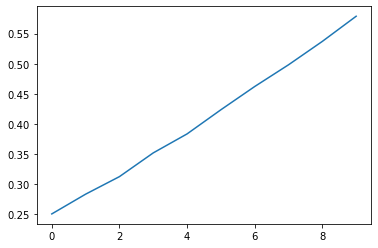

In [5]:
z = linspace(0,1,n)
total_dz = z - sim.z_arr 
total_dz = total_dz #- total_dz[0]
plot(total_dz)

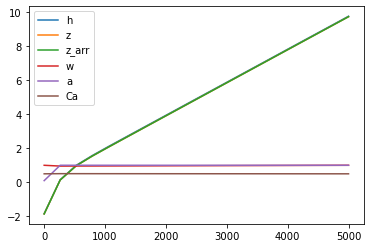

In [19]:
x = linspace(0,5000,n)
#z = linspace(0,1,n)

xmid = (x[1:] + x[:-1])/2.
plot(x, sim.h)
plot(x,z)
plot(x,sim.z_arr)

#plot(xmid,sim.fd_mids)
plot(x,sim.CO2_w)
plot(x,sim.CO2_a)
plot(x,sim.Ca)
legend(['h','z','z_arr','w','a','Ca'])


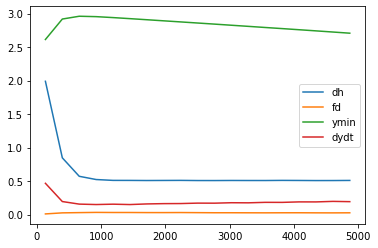

In [20]:
xmid = (x[1:] + x[:-1])/2.
plot(xmid, sim.h[1:]-sim.h[:-1])
plot(xmid,sim.fd_mids)

ymins = []
dydt = []
for i in arange(n-1):
    #print('i=',i, '  ymin=',sim.xcs[i].y.min())
    ymins.append(sim.xcs[i].ymin)
    dydt.append(sim.xcs[i].dr.max())
    
plot(xmid,array(ymins)+4.)
plot(xmid,array(dydt)*100)
legend(['dh','fd','ymin','dydt'])

[6.37186179e-03 6.29743630e-04 2.96908857e-04 2.02050403e-04
 2.79565418e-04 1.40895594e-05 3.67657213e-04 1.55055223e-04
 2.13509180e-04 1.00369826e-04 2.46259163e-04 1.33353888e-04
 2.02769866e-04 1.67970864e-04 1.70240432e-04 1.54624537e-04
 2.02645352e-04 1.39514577e-05 3.22072051e-04]


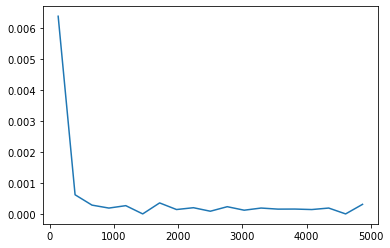

In [12]:
plot(xmid,sim.slopes)
print(sim.slopes)

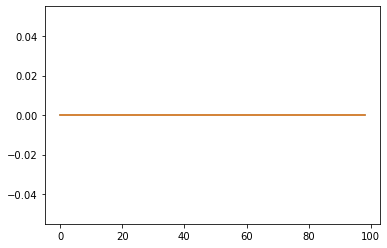

In [17]:
plot(sim.down_offsets)
plot(sim.up_offsets)

In [21]:
sim.flow_type

array(['norm', 'norm', 'norm', 'norm', 'norm', 'norm', 'norm', 'norm',
       'norm', 'norm', 'norm', 'norm', 'norm', 'norm', 'norm', 'norm',
       'norm', 'norm', 'norm'], dtype=object)

In [ ]:
from scipy.interpolate import splprep,splev,interp1d

In [ ]:
splprep()
splev()
interp1d()

In [ ]:
print(sim.flow_type)
print(sim.A_a)
print(sim.A_w)
print(sim.fd_mids)
for i in arange(n-1):
    print('i=',i, '  ymin=',sim.xcs[i].y.min())

about to minimize
found min
Q residual for 0.010573793950320537  = 0.008018955100864082
norm_fd= -1.3768176586689804
crit fd, y= -1.3793275909200753


0.05

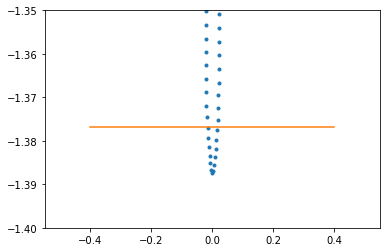

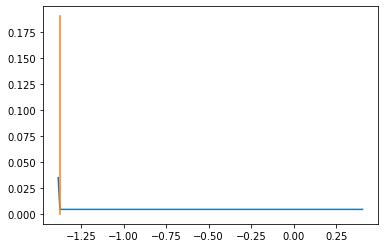

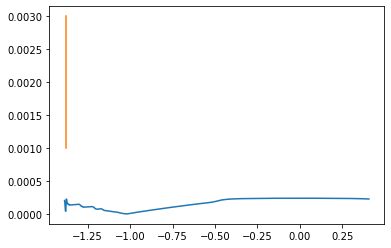

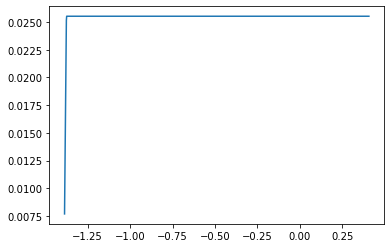

In [26]:
from scipy.signal import savgol_filter

i=0

g=9.8
f=0.1
x=sim.xcs[i].x
y=sim.xcs[i].y
xp=sim.xcs[i].xp
yp=sim.xcs[i].yp
xm=sim.xcs[i].xm
ym=sim.xcs[i].ym
plot(x,y,'.')
wl = sim.fd_mids[i] + y.min()
#wl_old = fd_old + y.min()
plot([-.4,.4],[wl,wl])
#plot([-.4,.4],[wl_old,wl_old],'--')
#xlim([-2.8,2.8])
ylim([-1.4,-1.35])
maxdepth = y.max() - y.min()
fds=maxdepth*linspace(0.001,0.95,1000)
res=[]
res_alt=[]
res2 = []
As = []
Pws = []
for fd in fds:
    A = sim.xcs[i].A_interp(fd)
    P = sim.xcs[i].P_interp(fd)
    D_H = 4.*A/P
    Q = sign(sim.slopes[i])*A*sqrt(2.*g*abs(sim.slopes[i])*D_H/f)
    res_alt.append(A*sqrt(D_H)-sim.Q_w/(sign(sim.slopes[i])*sqrt(2.*g*abs(sim.slopes[i])/f)))#(abs(sim.Q_w - Q)))
    
    res.append(sim.xcs[i].abs_normal_discharge_residual(fd,sim.slopes[i],0.1,sim.Q_w))
    As.append(sim.xcs[i].calcA(wantidx=y-y.min()<fd))
    Pws.append(sim.xcs[i].calcP(wantidx=y-y.min()<fd))
    res2.append(sim.xcs[i].abs_crit_flow_depth_residual(fd,sim.Q_w))

As = array(As)
fil_As = savgol_filter(As,35,1)


figure()
plot(fds+y.min(),res)
norm_fd_y = sim.xcs[i].calcNormalFlowDepth(sim.Q_w,sim.slopes[i],f=f,old_fd=sim.fd_mids[i]) + y.min()
plot([norm_fd_y,norm_fd_y], [0.0,0.19])
print('norm_fd=',norm_fd_y)
#plot(fds*maxdepth+y.min(),res2)

#plot(fds*maxdepth+y.min(),res_alt)
#plot(fil_As,res_alt)
#xlim([-4,-3])

#ylim([-.05,.2])
#ylim([-0.05,0.05])
figure()
plot(fds+y.min(),res2)
crit_fd_y = sim.xcs[i].calcCritFlowDepth(sim.Q_w)+y.min()
print('crit fd, y=',crit_fd_y)
plot([crit_fd_y,crit_fd_y],[0.001,0.003])
#xlim([-4,-3])
#print(res[0]-res[1])


figure()
#sim.xcs[i].create_A_interp()
#A_spline=sim.xcs[i].AfromSpline(fds*maxdepth)
#sim.xcs[i].create_P_interp()


#plot(fds*maxdepth+y.min(),As)
#plot(fds*maxdepth+y.min(),fil_As)
plot(fds+y.min(),sim.xcs[i].A_interp(fds))

#figure()
#plot(fds*maxdepth+y.min(),Pws)
#plot(fds*maxdepth+y.min(),sim.xcs[i].P_interp(fds))

#figure()

#Pws = array(Pws)
#Qs = fil_As*sqrt(4*fil_As/Pws)
#plot(fds*maxdepth+y.min(),Qs)

#print(Pws[0])
#sim.fd_mids[i]+y.min()
sim.xcs[i].abs_normal_discharge_residual(-3.4-y.min(), sim.slopes[i], 0.1, sim.Q_w)
#-3.67486-y.min()

In [ ]:
fds

In [ ]:
Tb=sim.xcs[-1].T_b
ywet = y[sim.xcs[-1].wetidx]
xwet = x[sim.xcs[-1].wetidx]
#plot(xwet[1:],Tb[1:]-Tb[:-1])
#plot(xwet,Tb)
dr=sim.xcs[-1].dr
#plot(xwet[1:],dr[1:]-dr[:-1])
plot(xwet,dr)

In [ ]:
from scipy.signal import savgol_filter

fil_dr = savgol_filter(dr,15,3,mode='wrap')
plot(xwet,dr,xwet,fil_dr)
figure()
plot(fil_dr[1:]-fil_dr[:-1])

In [ ]:
diff_bnd=0
diff_bnd2=1

V_w = sim.V_w
V_w_mean = sim.V_w_mean
dx = sim.dx_ad
dt = sim.dt_ad
CO2_w = sim.CO2_w
CO2_a = sim.CO2_a
print((1./dt -(np.sign(V_w[0])*V_w[diff_bnd]/V_w_mean)/(2.*dx))*CO2_w[diff_bnd])

print(((np.sign(V_w[0])*V_w[diff_bnd]/V_w_mean)/(2*dx))*CO2_w[diff_bnd2])

In [ ]:
sim.

In [ ]:
np.sign(V_w[0])*(V_w[diff_bnd]/V_w_mean)

In [ ]:
V_w_mean

In [ ]:
from olm.calcite import concCaEqFromPCO2,solutionFromCaPCO2,palmerFromSolution,pwpFromSolution,pwp_to_mm_yr

In [ ]:
concCaEqFromPCO2()

In [ ]:
from olm.calcite import concCaEqFromPCO2,solutionFromCaPCO2,palmerFromSolution,calc_K_H
g=9.8#m/s^2
rho_limestone = 2.6#g/cm^3
rho_w = 998.2#kg/m^3
D_Ca = 10**-9#m^2/s
nu = 1.3e-6#m^2/s at 10 C
Sc = nu/D_Ca
g_mol_CaCO3 = 100.09
L_per_m3 = 1000.
secs_per_year =  3.154e7
secs_per_hour = 60.*60.


#print(Sc)

In [ ]:
sim.update_dimnless_params()
sim.initialize_conc_arrays()

K_w = sim.gas_transf_vel*sim.W/sim.A_w
K_a = sim.gas_transf_vel*sim.W/sim.A_a
        

F = np.zeros(sim.n_nodes - 1)
F_palmer = np.zeros(sim.n_nodes - 1)

mm_yr_to_mols_sec = 100.*rho_limestone/g_mol_CaCO3/secs_per_year/100./(sim.D_H_w/2.)

i=sim.n_nodes-1
this_CO2_w = sim.CO2_w[i]*sim.pCO2_high
this_CO2_a = sim.CO2_a[i]*sim.pCO2_high
this_Ca = sim.Ca[i]*sim.Ca_eq_0
#if palmer:
sol = solutionFromCaPCO2(this_Ca, this_CO2_w, T_C=sim.T_cave)
F_pwp = pwp_to_mm_yr(pwpFromSolution(sol,PCO2=this_CO2_w))
F_palmer[i-1] = palmerFromSolution(sol, PCO2=this_CO2_w)
R_palmer = F_palmer[i-1]*mm_yr_to_mols_sec[i-1]
this_xc = sim.xcs[i-1]
eSlope = (sim.h[i] - sim.h[i-1])/sim.L_arr[i-1]
this_xc.setEnergySlope(eSlope)
this_xc.setMaxVelPoint(sim.fd_mids[i-1])
this_xc.calcUmax(sim.Q_w)
T_b = this_xc.calcT_b()
eps = 5*nu*Sc**(-1./3.)/np.sqrt(T_b/rho_w)
#print(eps)
Ca_Eq = concCaEqFromPCO2(this_CO2_w, T_C=sim.T_cave)
#print(this_Ca,Ca_Eq)
F_xc = (D_Ca/eps)*(Ca_Eq - this_Ca)*L_per_m3
P_w = this_xc.wet_ls.sum()
A_w = this_xc.calcA(this_xc.wetidx)
F[i-1] = np.sum(F_xc*this_xc.wet_ls)/P_w #Units of F are mols/m^2/sec
R = F[i-1]*P_w*sim.L_arr[i-1]#4.*F[i-1]/sim.D_H_w[i-1]
sim.F = F
R_CO2 = R/sim.K_H
#dx is negative, so signs on dC terms flip
dCO2_a = -sim.L_arr[i-1]*K_a[i-1]/sim.V_a[i-1]*(this_CO2_w - this_CO2_a)
dCO2_w = sim.L_arr[i-1]*K_w[i-1]/sim.V_w[i-1]*(this_CO2_w - this_CO2_a) - R_CO2/sim.Q_w/L_per_m3#sim.L_arr[i-1]*R_CO2/sim.V_w[i-1]
dCa = R/sim.Q_w/L_per_m3#-sim.L_arr[i-1]*R/sim.V_w[i-1]/(sim.L_arr[i-1]*A_w)/L_per_m3
print(dCO2_a,dCO2_w,dCa)
sim.CO2_a[i-1] = (this_CO2_a + dCO2_a)/sim.pCO2_high
sim.CO2_w[i-1] = (this_CO2_w + dCO2_w)/sim.pCO2_high
sim.Ca[i-1] = (this_Ca + dCa)/sim.Ca_eq_0


In [ ]:
print(sim.Q_w)
print(A_w*sim.V_w[i-1])
sim.L_arr[i-1]*R_CO2/sim.V_w[i-1]
R_CO2/sim.Q_w/L_per_m3

In [ ]:
this_xc.x[this_xc.wetidx].shape
F_xc.

In [ ]:
Re = abs(sim.V_w[i-1])*sim.D_H_w[i-1]/nu
print(Re)
f = 0.1
Sh = (f/8)*(Re-1000)*Sc/(1+12.7*sqrt(f/8)*(Sc**(2./3.) - 1))
print(Sh)
eps_test = sim.D_H_w[i-1]/Sh
print(eps_test)

In [ ]:
D_Ca/eps_test

In [ ]:
sim.D_H_w[i-1]

In [ ]:
eSlope

In [ ]:
cm_m=100.
F_to_m_yr = g_mol_CaCO3*secs_per_year/rho_limestone/cm_m**3
print(F_to_m_yr*sim.xcs[0].F_xc)